In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor,DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,ExtraTreesRegressor,StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score
 


warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regression - Appliances Energy Predictions/data_application_energy.csv')
df = dataframe.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

* date time year-month-day hour:minute:second
* Appliances, energy use in Wh (Dependent variable)
* lights, energy use of light fixtures in the house in Wh (Drop this column)
* T1: Temperature in kitchen area in Celsius
* RH1: Humidity in kitchen area in %
* T2: Temperature in living room area in Celsius
* RH2: Humidity in living room area in %
* T3: Temperature in laundry room area in Celsius
* RH3: Humidity in laundry room area in %
* T4: Temperature in office room in Celsius
* RH4: Humidity in office room in %
* T5: Temperature in bathroom in Celsius
* RH5: Humidity in bathroom in %
* T6: Temperature outside the building (north side) in Celsius
* RH6: Humidity outside the building (north side) in %
* T7: Temperature in ironing room in Celsius
* RH7: Humidity in ironing room in %
* T8: Temperature in teenager room 2 in Celsius
* RH8: Humidity in teenager room 2 in %
* T9: Temperature in parents room in Celsius
* RH9: Humidity in parents room in %
* To: Temperature outside (from Chievres weather station) in Celsius
* Pressure (from Chievres weather station) in mm Hg
* RHout: Humidity outside (from Chievres weather station) in %
* Wind speed (from Chievres weather station) in m/s
* Visibility (from Chievres weather station) in km
* Tdewpoint (from Chievres weather station) Â°C
* rv1: Random variable 1
* rv2: Random variable 2

In [ ]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4       RH_4         T5   RH_5        T6  \
0  19.79  44.730000  19.000000  45.566667  17.166667  55.20  7.026667   
1  19.79  44.790000  19.000000  45.992500  17.166667  55.20  6.833333   
2  19.79  44.933333  18.926667  45.890000  17.166667  55.09  6.560000   
3  19.79  45.000000  18.890000  45.723333  17.166667  55.09  6.433333   
4  19.79  45.000000  18.890000  45.530000  17.200000  55.09  6.366667   

        RH_6         T7       RH_7    T8       RH_8         T9   RH_9  \
0  84.256667  17.200000  41.626667  18.2  48.900000  17.033333  45.53   
1  84.063333  17.200000  41.560000  18.2  48.863333  17.066667  45.56   
2  83.156667  17.200000  41.433333  18.2  48.730000  17.000000  45.50   
3  83.423333  17.133333  41.290000  18.1  48.590000  17.000000  45.40   
4  84.893333  17.200000  41.230000  18.1  48.590000  17.000000  45.40   

      T_out  Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
0  6.600000        733.5    92.0   7.000000   63.000000        5.3  13.275433   
1  6.483333        733.6    92.0   6.666667   59.166667        5.2  18.606195   
2  6.366667        733.7    92.0   6.333333   55.333333        5.1  28.642668   
3  6.250000        733.8    92.0   6.000000   51.500000        5.0  45.410389   
4  6.133333        733.9    92.0   5.666667   47.666667        4.9  10.084097   

         rv2  
0  13.275433  
1  18.606195  
2  28.642668  
3  45.410389  
4  10.084097

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
# Creating dictionary for renaming the columns

col_rename={'T1':'temp_kitchen','RH_1':'humidity_kitchen',
            'T2':'temp_living','RH_2':'humidity_living',
            'T3':'temp_laundry','RH_3':'humidity_laundry',
            'T4':'temp_office','RH_4':'humidity_office',
            'T5':'temp_bath', 'RH_5':'humidity_bath',
            'T6':'temp_out', 'RH_6':'humidity_out',
            'T7':'temp_ironing', 'RH_7':'humidity_ironing',
            'T8':'temp_teenage','RH_8':'humidity_teenage', 
            'T9':'temp_parent', 'RH_9':'humidity_parent', 
            'T_out':'temp_station', 'RH_out':'humidity_station', 
            }

In [ ]:
# Renaming the columns

df.rename(columns=col_rename,inplace=True)
df.head()

date  Appliances  lights  temp_kitchen  humidity_kitchen  \
0  2016-01-11 17:00:00          60      30         19.89         47.596667   
1  2016-01-11 17:10:00          60      30         19.89         46.693333   
2  2016-01-11 17:20:00          50      30         19.89         46.300000   
3  2016-01-11 17:30:00          50      40         19.89         46.066667   
4  2016-01-11 17:40:00          60      40         19.89         46.333333   

   temp_living  humidity_living  temp_laundry  humidity_laundry  temp_office  \
0         19.2        44.790000         19.79         44.730000    19.000000   
1         19.2        44.722500         19.79         44.790000    19.000000   
2         19.2        44.626667         19.79         44.933333    18.926667   
3         19.2        44.590000         19.79         45.000000    18.890000   
4         19.2        44.530000         19.79         45.000000    18.890000   

   humidity_office  temp_bath  humidity_bath  temp_out  humidity_out  \
0        45.566667  17.166667          55.20  7.026667     84.256667   
1        45.992500  17.166667          55.20  6.833333     84.063333   
2        45.890000  17.166667          55.09  6.560000     83.156667   
3        45.723333  17.166667          55.09  6.433333     83.423333   
4        45.530000  17.200000          55.09  6.366667     84.893333   

   temp_ironing  humidity_ironing  temp_teenage  humidity_teenage  \
0     17.200000         41.626667          18.2         48.900000   
1     17.200000         41.560000          18.2         48.863333   
2     17.200000         41.433333          18.2         48.730000   
3     17.133333         41.290000          18.1         48.590000   
4     17.200000         41.230000          18.1         48.590000   

   temp_parent  humidity_parent  temp_station  Press_mm_hg  humidity_station  \
0    17.033333            45.53      6.600000        733.5              92.0   
1    17.066667            45.56      6.483333        733.6              92.0   
2    17.000000            45.50      6.366667        733.7              92.0   
3    17.000000            45.40      6.250000        733.8              92.0   
4    17.000000            45.40      6.133333        733.9              92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2  
0   7.000000   63.000000        5.3  13.275433  13.275433  
1   6.666667   59.166667        5.2  18.606195  18.606195  
2   6.333333   55.333333        5.1  28.642668  28.642668  
3   6.000000   51.500000        5.0  45.410389  45.410389  
4   5.666667   47.666667        4.9  10.084097  10.084097

In [ ]:
# Segregating Temperature,humidity and weather indicators for seperate initial exploration

temperature_list = [feature for feature in df.columns if 'temp' in feature.split('_')]
humidity_list = [feature for feature in df.columns if 'humidity' in feature.split('_')]
weather_indicators = [feature for feature in df.columns if feature not in temperature_list and feature not in humidity_list]

print(temperature_list,'\n',humidity_list,'\n',weather_indicators)

['temp_kitchen', 'temp_living', 'temp_laundry', 'temp_office', 'temp_bath', 'temp_out', 'temp_ironing', 'temp_teenage', 'temp_parent', 'temp_station'] 
 ['humidity_kitchen', 'humidity_living', 'humidity_laundry', 'humidity_office', 'humidity_bath', 'humidity_out', 'humidity_ironing', 'humidity_teenage', 'humidity_parent', 'humidity_station'] 
 ['date', 'Appliances', 'lights', 'Press_mm_hg', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


In [ ]:
df[temperature_list].describe()

temp_kitchen   temp_living  temp_laundry   temp_office     temp_bath  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      21.686571     20.341219     22.267611     20.855335     19.592106   
std        1.606066      2.192974      2.006111      2.042884      1.844623   
min       16.790000     16.100000     17.200000     15.100000     15.330000   
25%       20.760000     18.790000     20.790000     19.530000     18.277500   
50%       21.600000     20.000000     22.100000     20.666667     19.390000   
75%       22.600000     21.500000     23.290000     22.100000     20.619643   
max       26.260000     29.856667     29.236000     26.200000     25.795000   

           temp_out  temp_ironing  temp_teenage   temp_parent  temp_station  
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000  
mean       7.910939     20.267106     22.029107     19.485828      7.411665  
std        6.090347      2.109993      1.956162      2.014712      5.317409  
min       -6.065000     15.390000     16.306667     14.890000     -5.000000  
25%        3.626667     18.700000     20.790000     18.000000      3.666667  
50%        7.300000     20.033333     22.100000     19.390000      6.916667  
75%       11.256000     21.600000     23.390000     20.600000     10.408333  
max       28.290000     26.000000     27.230000     24.500000     26.100000

* **We see that average temperature inside house is much higher than the average outside temperature and average station temperature outside, which indicates that there has been significant usage of power to keep the house warm.**
* **The temperatures outside the house temp_out and at weather station temp_station is more deviated from the mean and also more skewed than other temperature variables. It may be the case that sensors might have been kept outside.**



In [ ]:
df[humidity_list].describe()

humidity_kitchen  humidity_living  humidity_laundry  humidity_office  \
count      19735.000000     19735.000000      19735.000000     19735.000000   
mean          40.259739        40.420420         39.242500        39.026904   
std            3.979299         4.069813          3.254576         4.341321   
min           27.023333        20.463333         28.766667        27.660000   
25%           37.333333        37.900000         36.900000        35.530000   
50%           39.656667        40.500000         38.530000        38.400000   
75%           43.066667        43.260000         41.760000        42.156667   
max           63.360000        56.026667         50.163333        51.090000   

       humidity_bath  humidity_out  humidity_ironing  humidity_teenage  \
count   19735.000000  19735.000000      19735.000000      19735.000000   
mean       50.949283     54.609083         35.388200         42.936165   
std         9.022034     31.149806          5.114208          5.224361   
min        29.815000      1.000000         23.200000         29.600000   
25%        45.400000     30.025000         31.500000         39.066667   
50%        49.090000     55.290000         34.863333         42.375000   
75%        53.663333     83.226667         39.000000         46.536000   
max        96.321667     99.900000         51.400000         58.780000   

       humidity_parent  humidity_station  
count     19735.000000      19735.000000  
mean         41.552401         79.750418  
std           4.151497         14.901088  
min          29.166667         24.000000  
25%          38.500000         70.333333  
50%          40.900000         83.666667  
75%          44.338095         91.666667  
max          53.326667        100.000000

* Most deviation from the mean is seen for the humidity outside the house <b> humidity_out </b> and humidity at weather station <b> humidity_station </b>.

In [ ]:
df[weather_indicators].describe()

Appliances        lights   Press_mm_hg     Windspeed    Visibility  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875    755.522602      4.039752     38.330834   
std      102.524891      7.935988      7.399441      2.451221     11.794719   
min       10.000000      0.000000    729.300000      0.000000      1.000000   
25%       50.000000      0.000000    750.933333      2.000000     29.000000   
50%       60.000000      0.000000    756.100000      3.666667     40.000000   
75%      100.000000      0.000000    760.933333      5.500000     40.000000   
max     1080.000000     70.000000    772.300000     14.000000     66.000000   

          Tdewpoint           rv1           rv2  
count  19735.000000  19735.000000  19735.000000  
mean       3.760707     24.988033     24.988033  
std        4.194648     14.496634     14.496634  
min       -6.600000      0.005322      0.005322  
25%        0.900000     12.497889     12.497889  
50%        3.433333     24.897653     24.897653  
75%        6.566667     37.583769     37.583769  
max       15.500000     49.996530     49.996530

* **We see that the light feature has 75% of the distributed data as 0. Hence, it will hardly be any significant in our analysis and prediction. We will drop this feature.**
* Upto <b>75%  of Appliances consumption is less than 100 unit </b>. Thus there is less cases present with very high consumption of appliances.
* The distibution of the <b> rv1 and rv2 </b> is almost same. So we can remove one variable to overcome <b> multicollinearity.</b>
* The <b>75% of observations</b> for <b> light </b> column is 0. So we can drop that column to maintain the purity of the data.

In [ ]:
# Dropping less significant lights feature from the dataset 

df.drop('lights',axis=1,inplace = True)

In [ ]:
# Converting  date feature to datetime Dtype from object Dtype 
df['date'] = pd.to_datetime(df['date'])

In [ ]:
weekday= {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
month = {1:'January',2:'February',3:'March',4:'April',5:'May'}

In [ ]:
df['Weekday'] = df['date'].dt.weekday#.map(weekday)
df['Month'] = df['date'].dt.month#.map(month)
df['Hour'] = df['date'].dt.hour
df['Day'] = df['date'].dt.day

In [ ]:
df.head()

date  Appliances  temp_kitchen  humidity_kitchen  \
0 2016-01-11 17:00:00          60         19.89         47.596667   
1 2016-01-11 17:10:00          60         19.89         46.693333   
2 2016-01-11 17:20:00          50         19.89         46.300000   
3 2016-01-11 17:30:00          50         19.89         46.066667   
4 2016-01-11 17:40:00          60         19.89         46.333333   

   temp_living  humidity_living  temp_laundry  humidity_laundry  temp_office  \
0         19.2        44.790000         19.79         44.730000    19.000000   
1         19.2        44.722500         19.79         44.790000    19.000000   
2         19.2        44.626667         19.79         44.933333    18.926667   
3         19.2        44.590000         19.79         45.000000    18.890000   
4         19.2        44.530000         19.79         45.000000    18.890000   

   humidity_office  temp_bath  humidity_bath  temp_out  humidity_out  \
0        45.566667  17.166667          55.20  7.026667     84.256667   
1        45.992500  17.166667          55.20  6.833333     84.063333   
2        45.890000  17.166667          55.09  6.560000     83.156667   
3        45.723333  17.166667          55.09  6.433333     83.423333   
4        45.530000  17.200000          55.09  6.366667     84.893333   

   temp_ironing  humidity_ironing  temp_teenage  humidity_teenage  \
0     17.200000         41.626667          18.2         48.900000   
1     17.200000         41.560000          18.2         48.863333   
2     17.200000         41.433333          18.2         48.730000   
3     17.133333         41.290000          18.1         48.590000   
4     17.200000         41.230000          18.1         48.590000   

   temp_parent  humidity_parent  temp_station  Press_mm_hg  humidity_station  \
0    17.033333            45.53      6.600000        733.5              92.0   
1    17.066667            45.56      6.483333        733.6              92.0   
2    17.000000            45.50      6.366667        733.7              92.0   
3    17.000000            45.40      6.250000        733.8              92.0   
4    17.000000            45.40      6.133333        733.9              92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2  Weekday  Month  \
0   7.000000   63.000000        5.3  13.275433  13.275433        0      1   
1   6.666667   59.166667        5.2  18.606195  18.606195        0      1   
2   6.333333   55.333333        5.1  28.642668  28.642668        0      1   
3   6.000000   51.500000        5.0  45.410389  45.410389        0      1   
4   5.666667   47.666667        4.9  10.084097  10.084097        0      1   

   Hour  Day  
0    17   11  
1    17   11  
2    17   11  
3    17   11  
4    17   11

### EDA 

#### Univariate Analysis

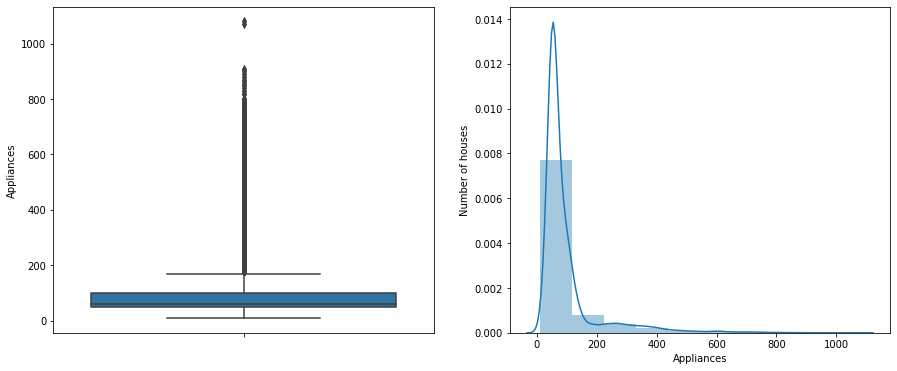

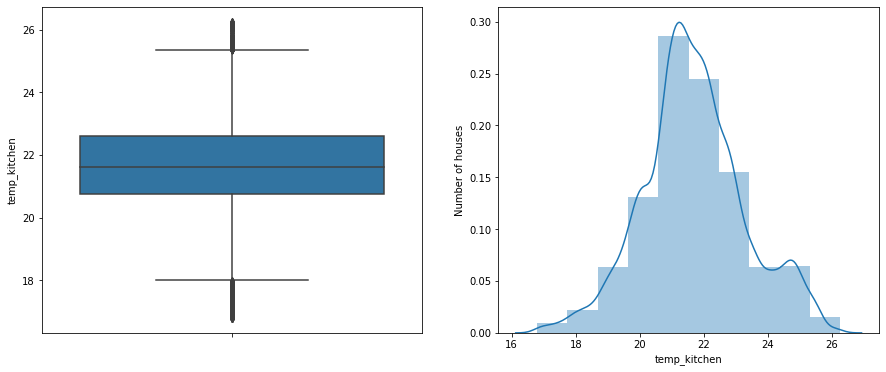

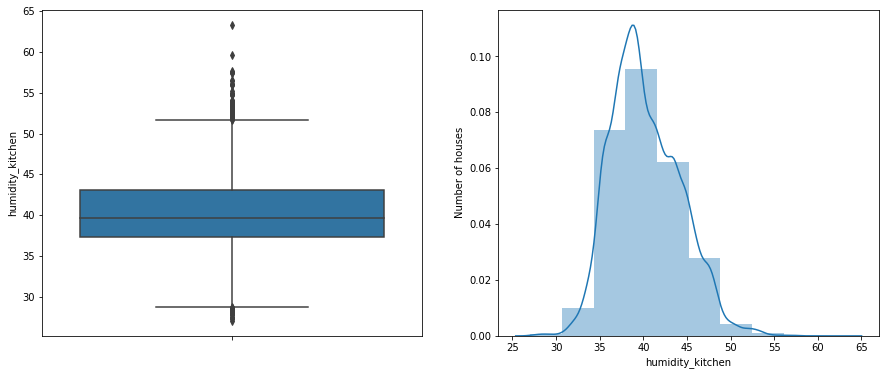

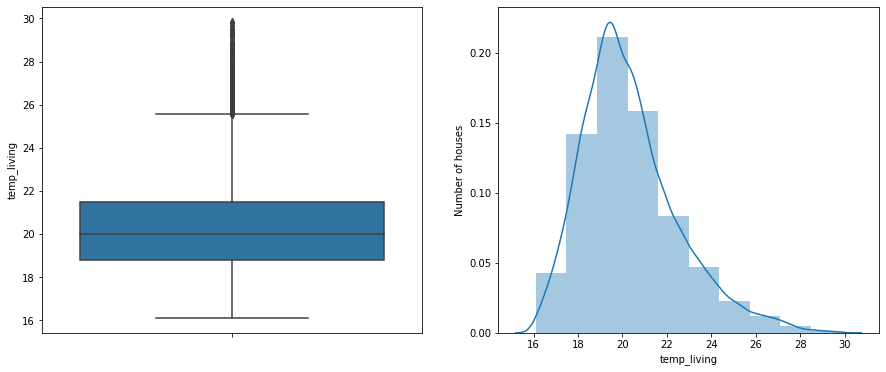

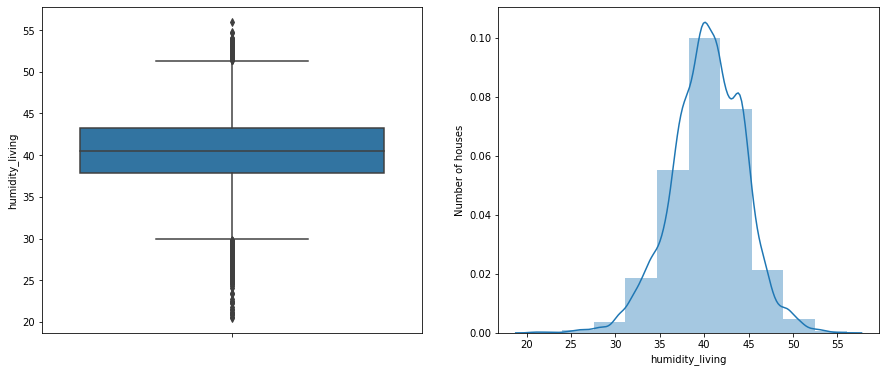

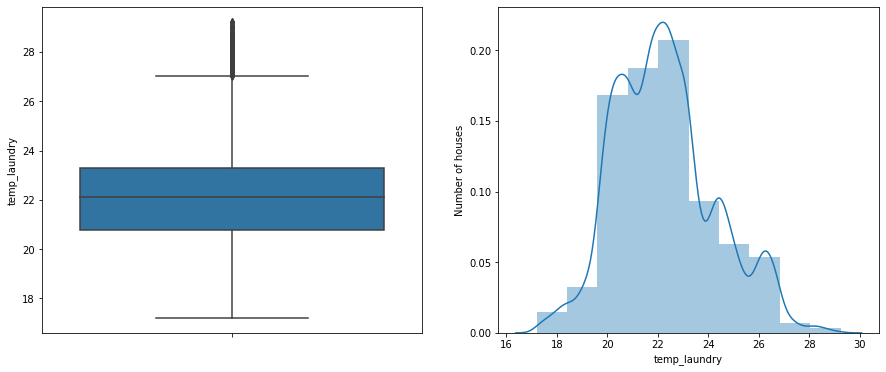

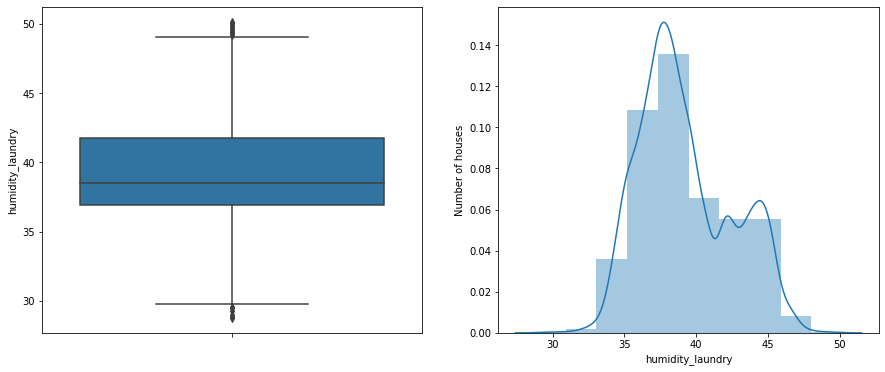

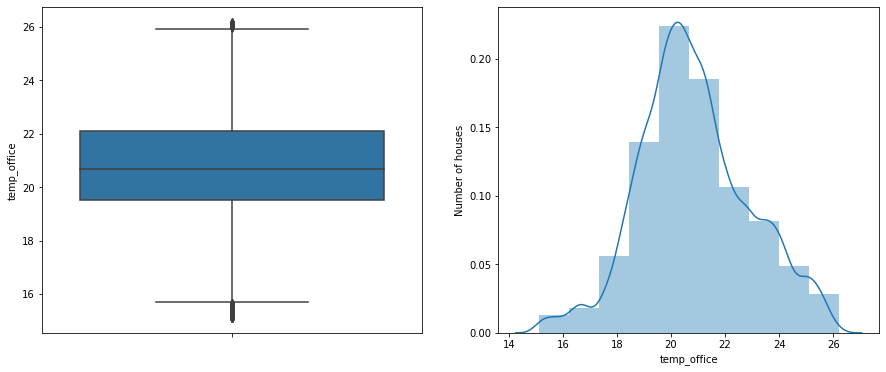

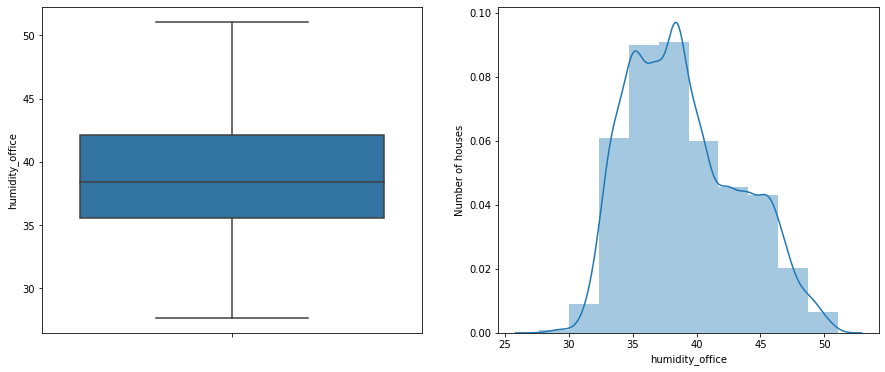

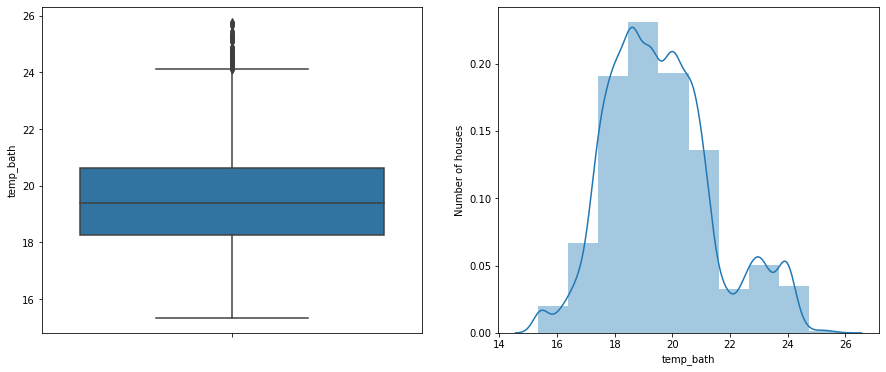

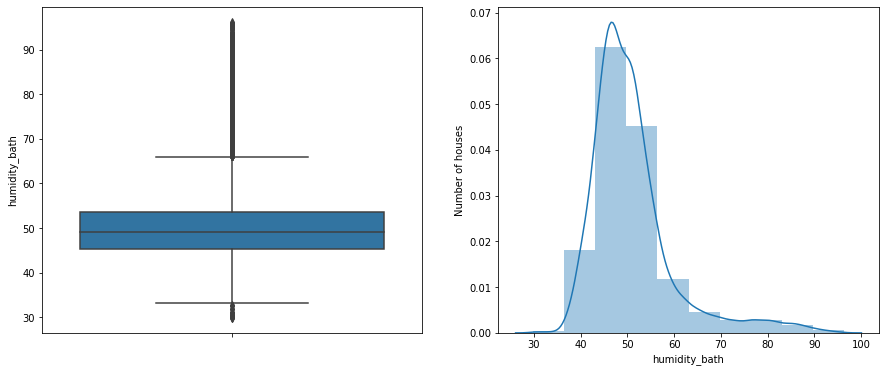

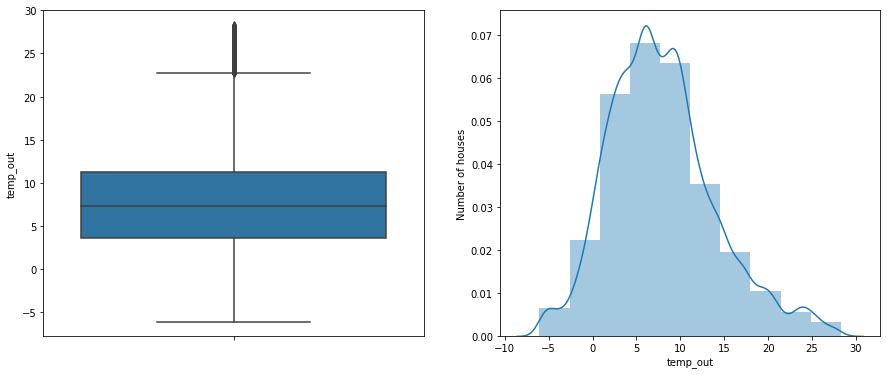

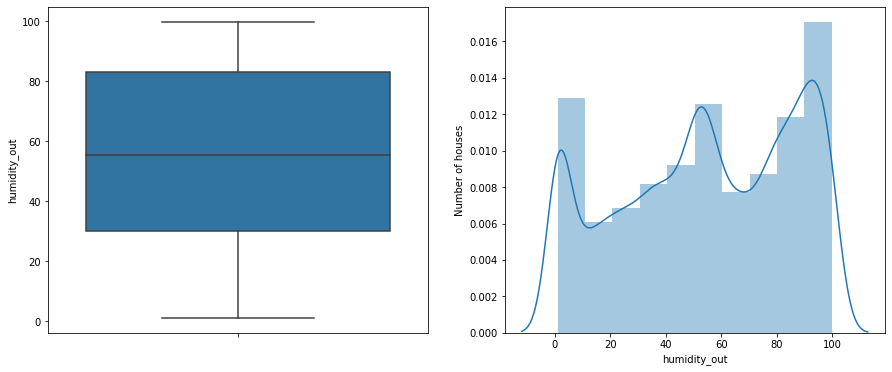

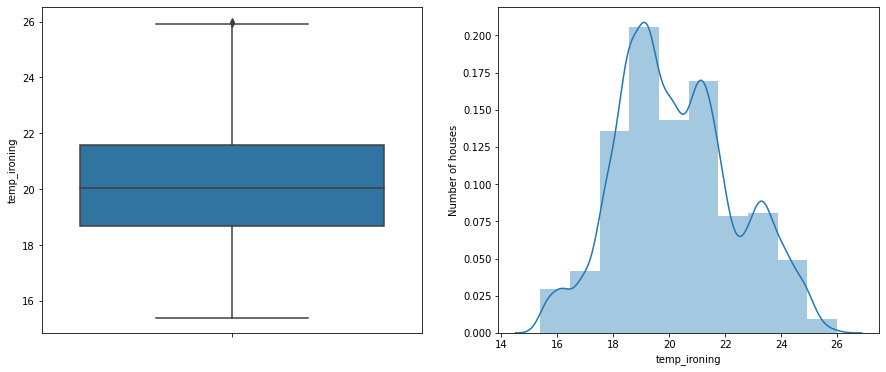

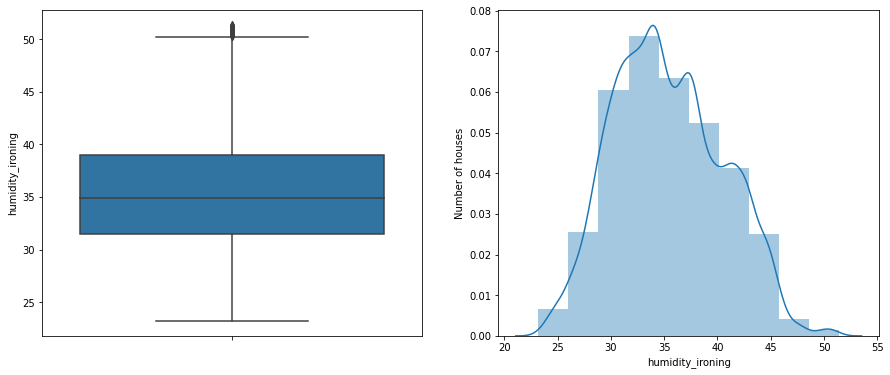

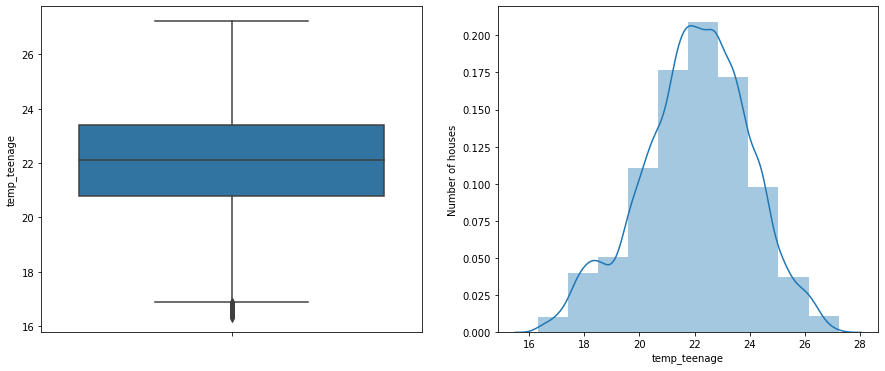

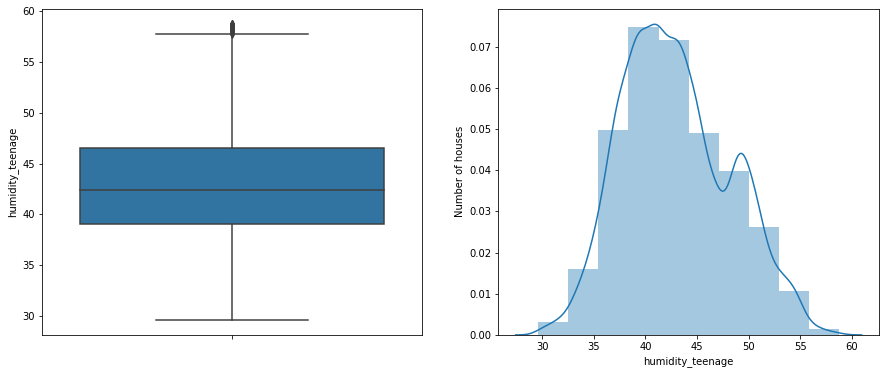

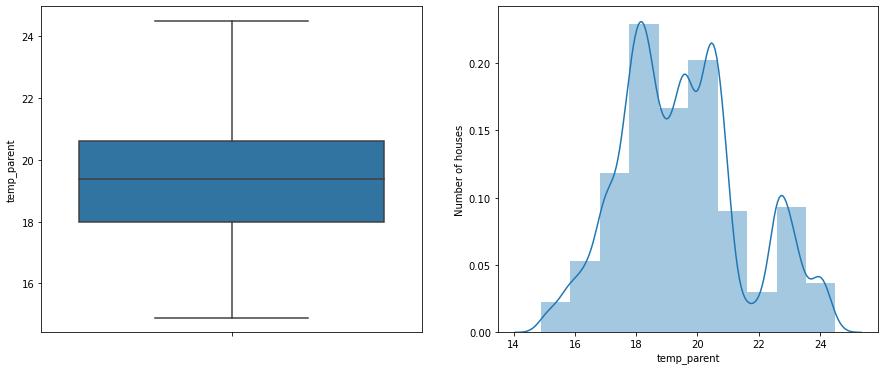

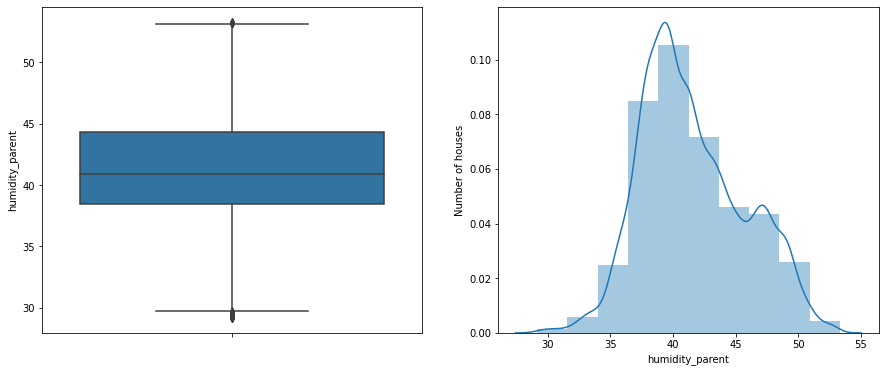

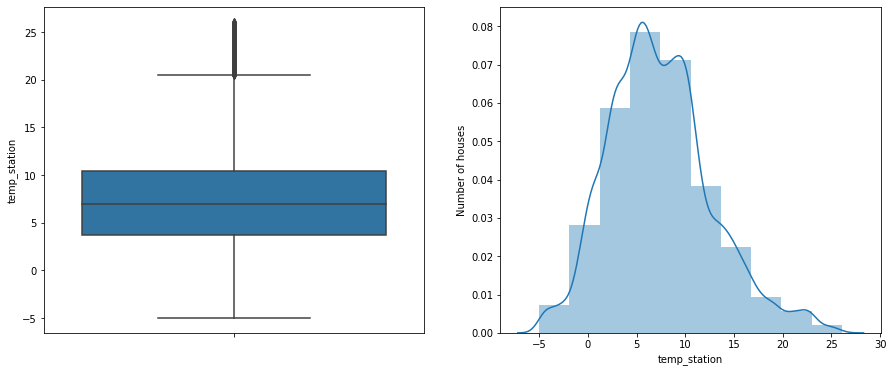

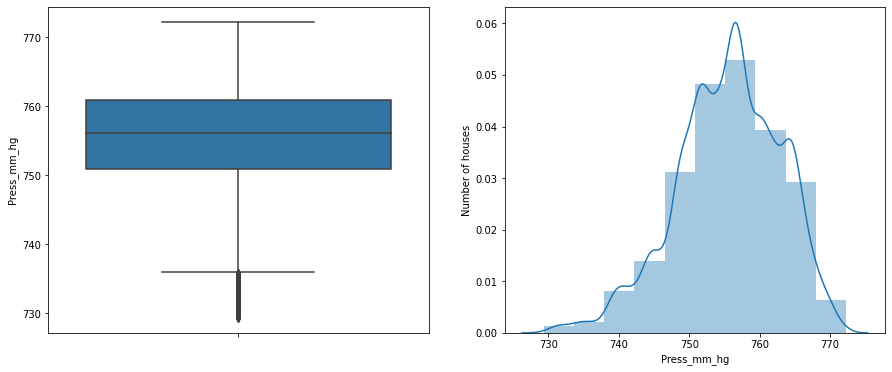

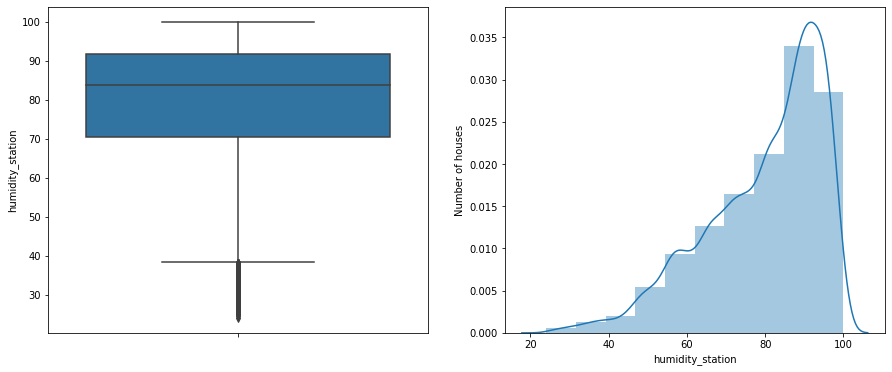

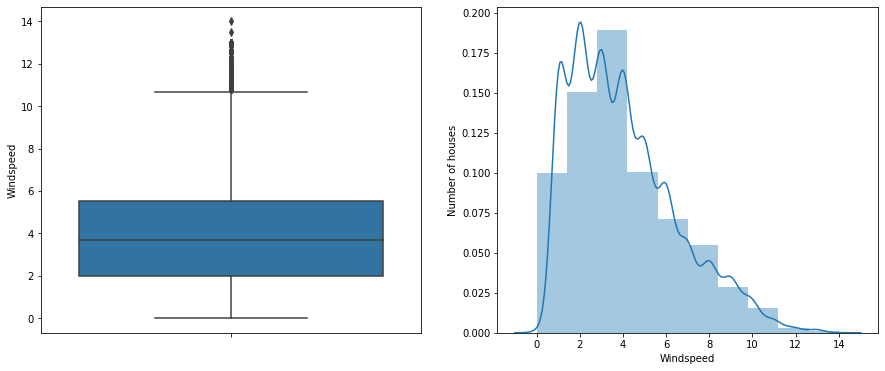

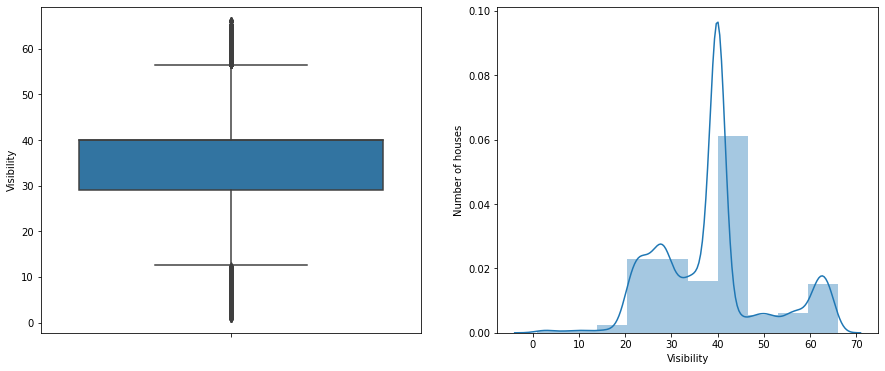

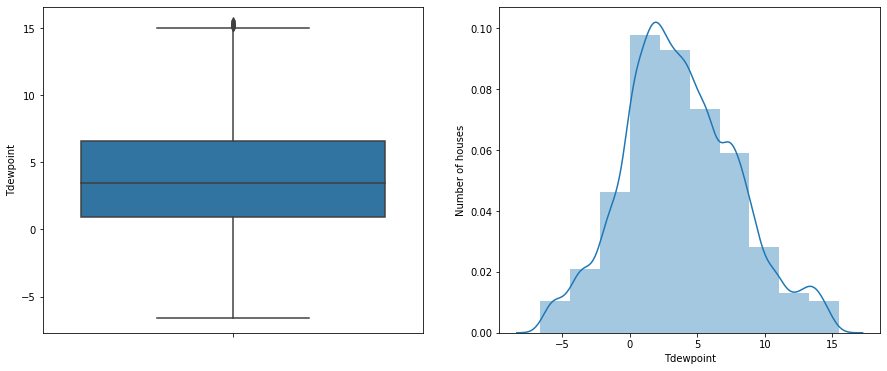

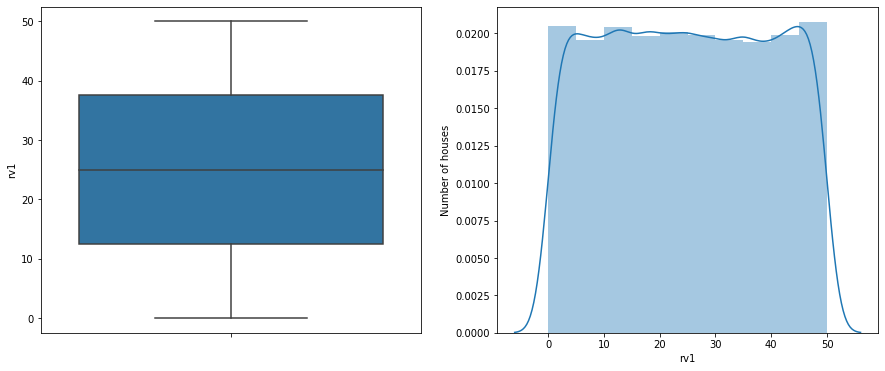

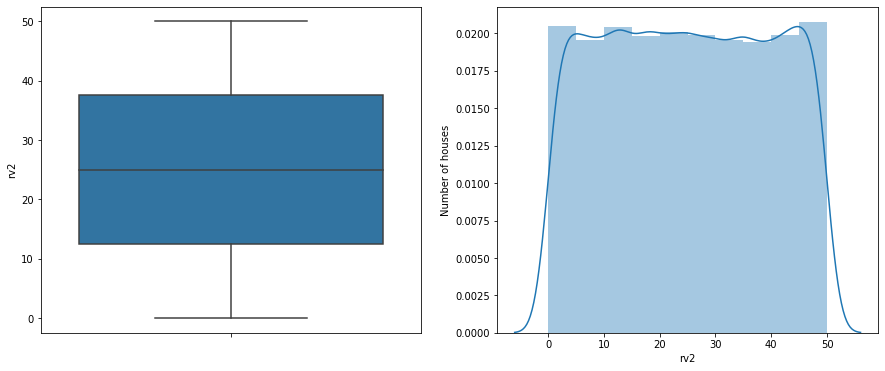

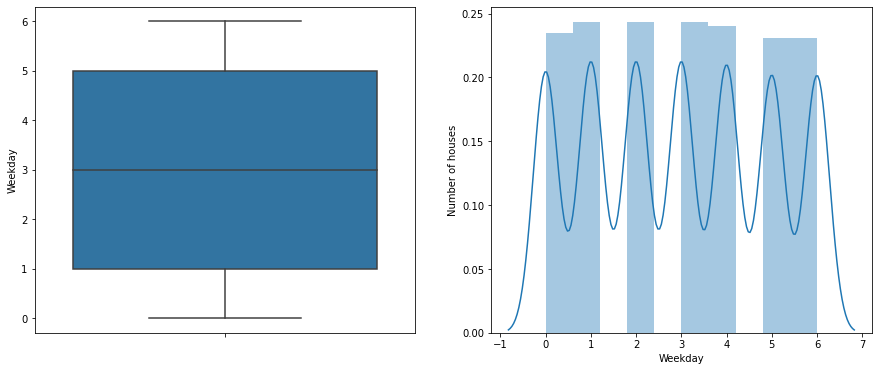

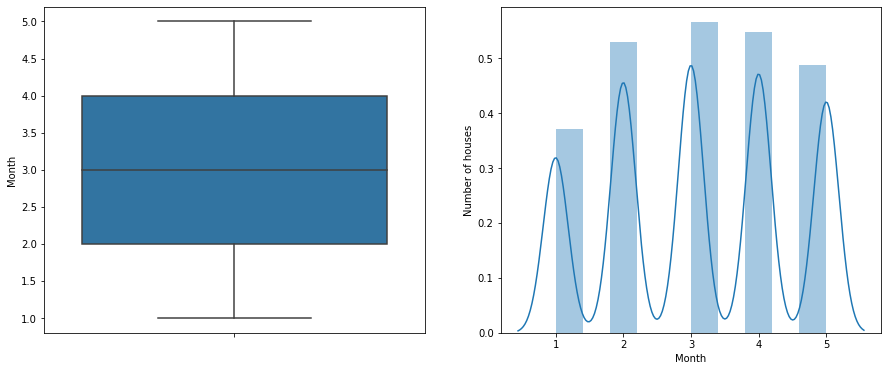

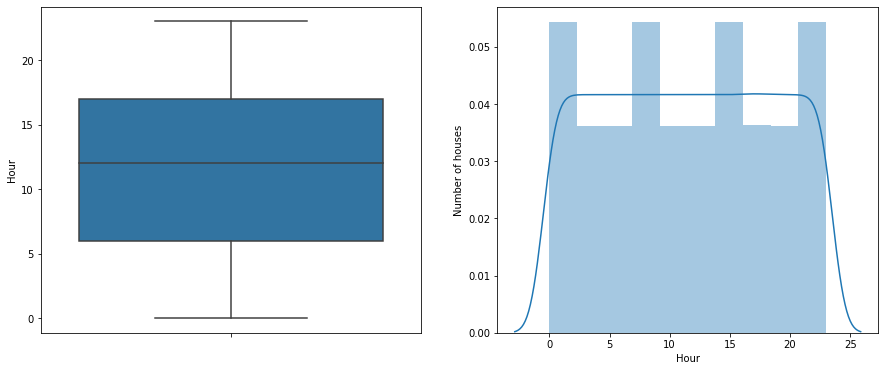

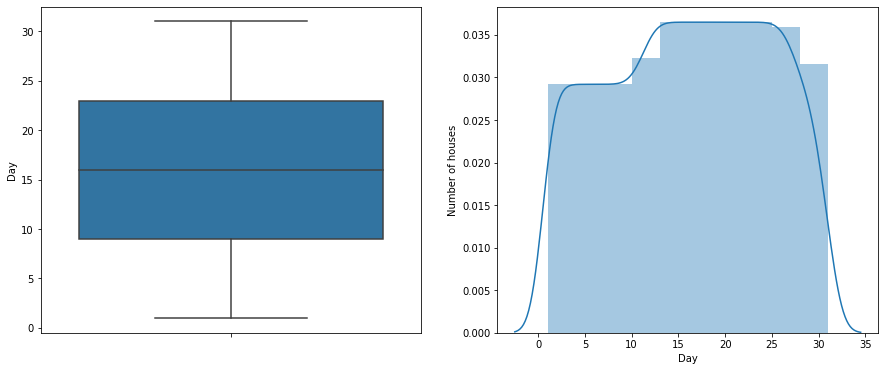

In [ ]:
for feature in df.columns[1:]:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[feature])
    fig.set_title('')
    fig.set_ylabel(feature)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[feature],bins=10)
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(feature)

    plt.show()

* **These Distributions has outliers which will be treated in our next section**

**Appliances(Target) column Analysis**

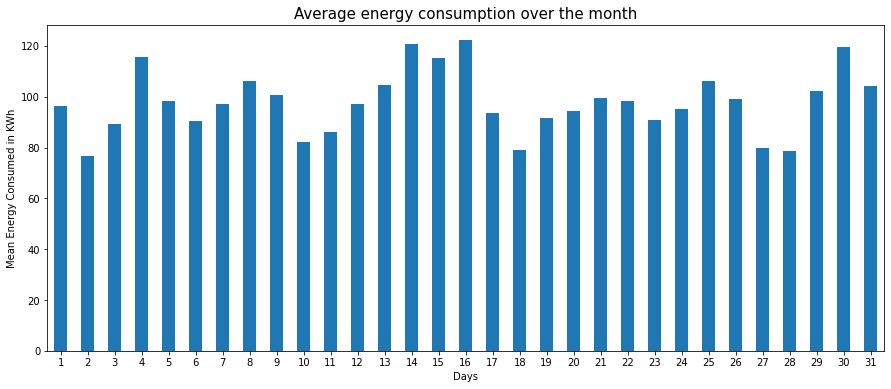

In [ ]:
#day wise appliance energy consumption

day_consumption=df.groupby(df['date'].dt.day)['Appliances'].mean()
plt.figure(figsize=(15,6))
day_consumption.plot(kind='bar')
plt.title('Average energy consumption over the month',fontsize=15)
plt.xlabel('Days')
plt.ylabel('Mean Energy Consumed in KWh')
plt.xticks(rotation=0)
plt.show()

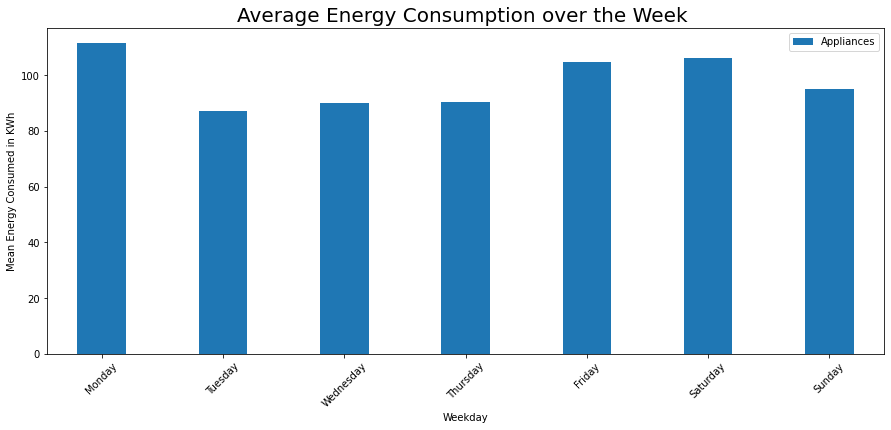

In [ ]:
df.groupby(['Weekday']).agg({'Appliances':'mean'}).plot(kind='bar',figsize=(15,6),width=0.4)
plt.xticks(rotation = 45, ticks=[0,1,2,3,4,5,6], labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], fontsize = 10)
plt.ylabel('Mean Energy Consumed in KWh')
plt.title('Average Energy Consumption over the Week ',fontdict={'fontsize':20})
plt.show()

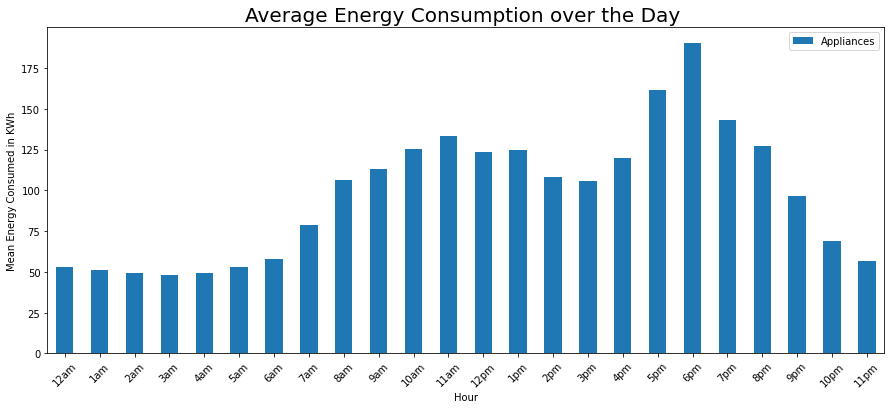

In [ ]:
df.groupby(['Hour']).agg({'Appliances':'mean'}).plot(kind='bar',figsize=(15,6))
plt.xticks(rotation = 45, ticks=np.arange(0,24), labels = ['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am',
                                                          '12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm'], fontsize = 10)
plt.ylabel('Mean Energy Consumed in KWh')
plt.title('Average Energy Consumption over the Day ',fontdict={'fontsize':20})
plt.show()

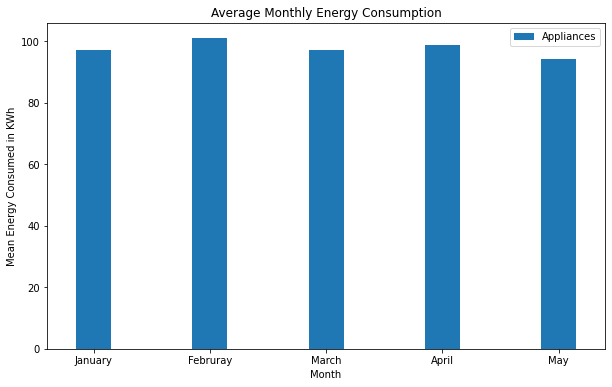

In [ ]:
df.groupby(['Month']).agg({'Appliances':'mean'}).plot(kind='bar',figsize=(10,6),width=0.3)
plt.xticks(rotation = 0, ticks=[0,1,2,3,4], labels = ['January','Februray','March','April','May'], fontsize = 10)
plt.ylabel('Mean Energy Consumed in KWh')
plt.title('Average Monthly Energy Consumption')
plt.show()

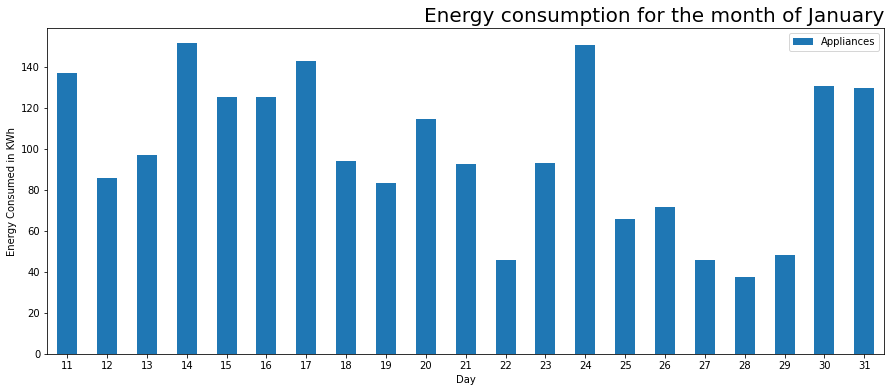

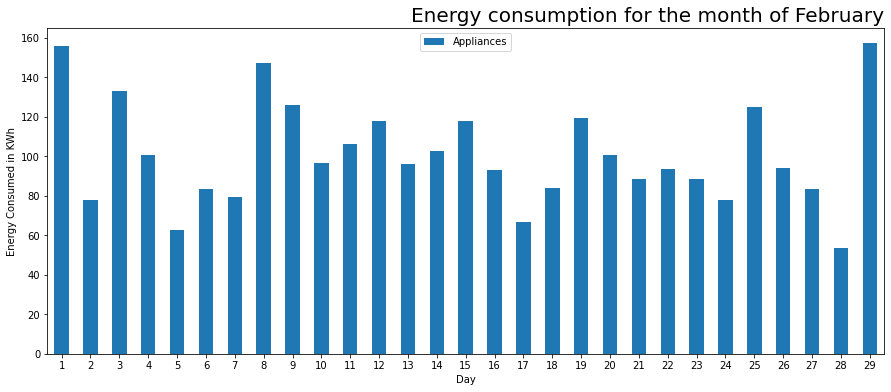

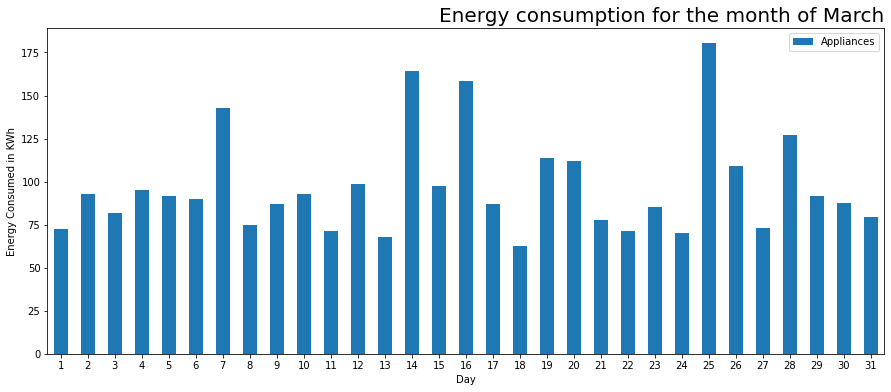

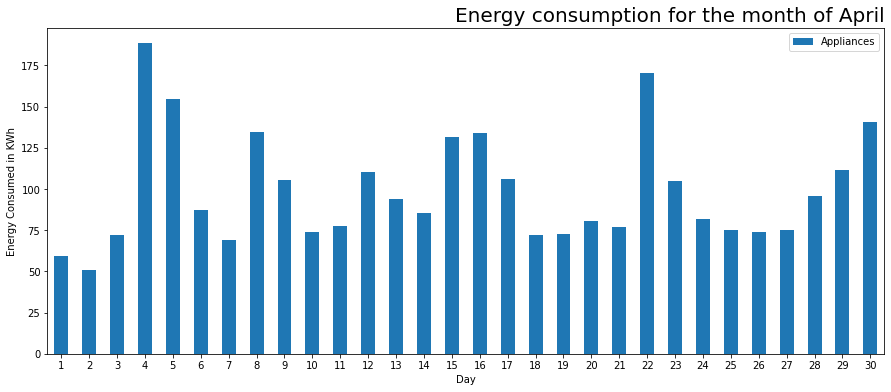

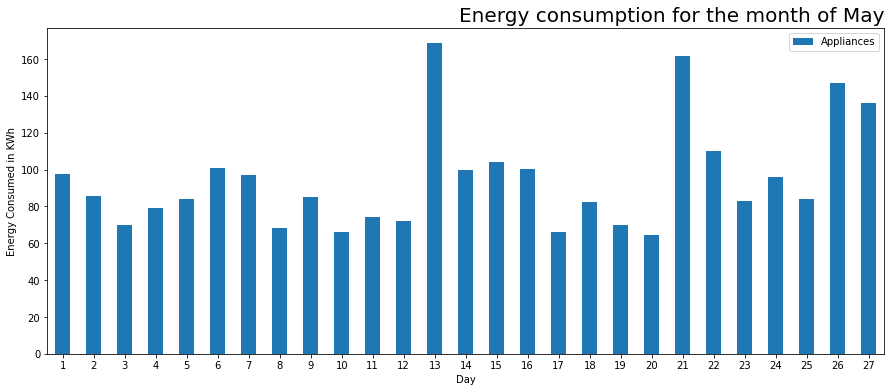

In [ ]:
for i in range(1,6):
  df.loc[df['Month']==i,['Appliances','Day']].groupby('Day').agg({'Appliances':'mean'}).plot(kind='bar',figsize=(15,6))
  plt.xticks(rotation = 0)
  plt.ylabel('Energy Consumed in KWh')
  plt.title(f'Energy consumption for the month of {month[i]}',fontdict={'fontsize':20},loc='right')
  plt.show()

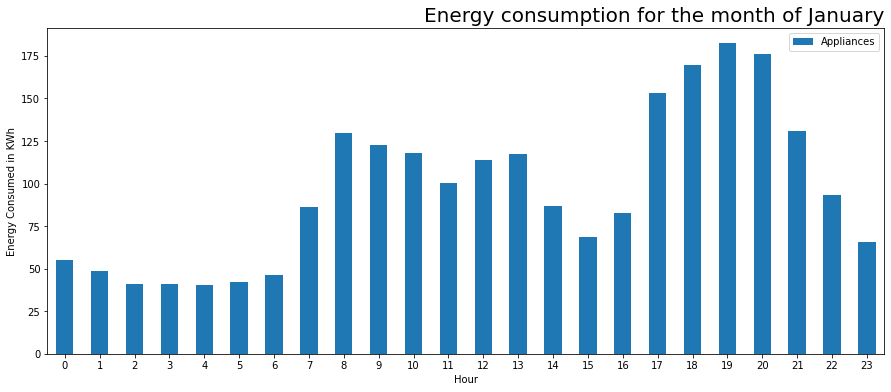

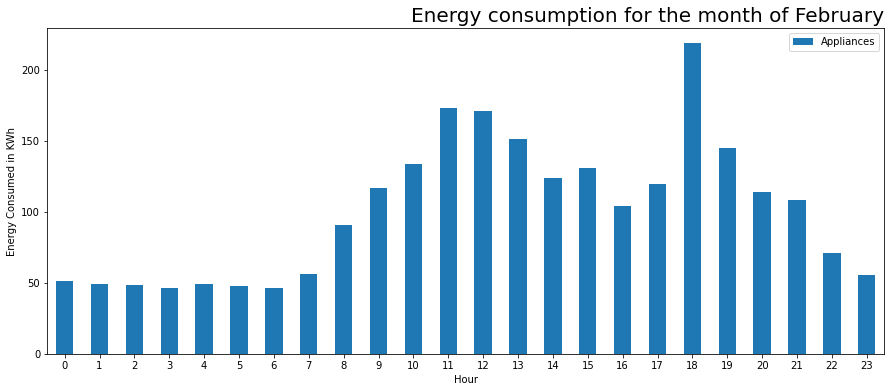

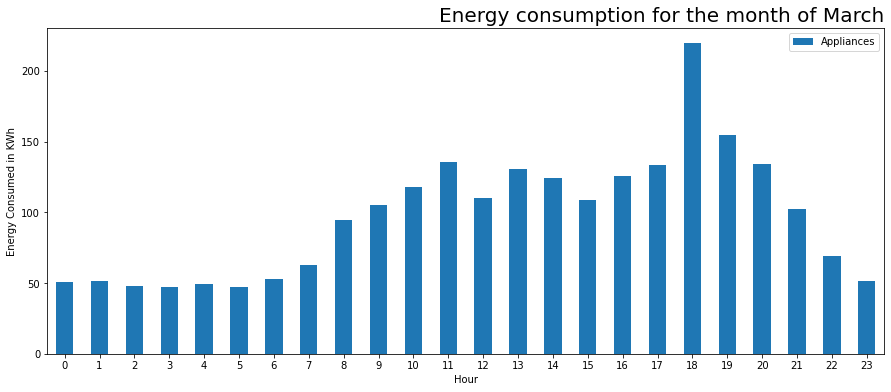

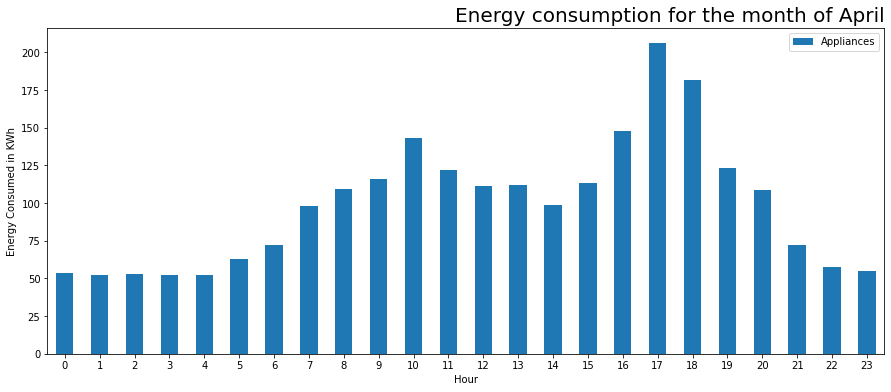

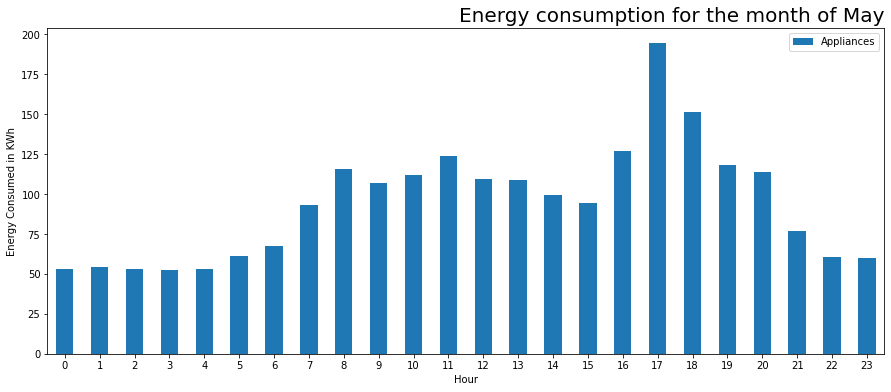

In [ ]:
for i in range(1,6):
  df.loc[df['Month']==i,['Appliances','Hour']].groupby('Hour').agg({'Appliances':'mean'}).plot(kind='bar',figsize=(15,6))
  plt.xticks(rotation = 0)
  plt.ylabel('Energy Consumed in KWh')
  plt.title(f'Energy consumption for the month of {month[i]}',fontdict={'fontsize':20},loc='right')
  plt.show()

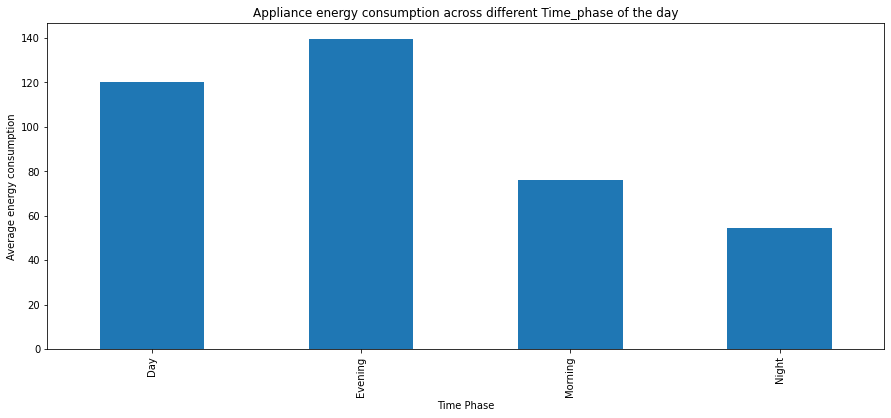

In [ ]:
df1=df.copy()
df1['Time_hour']=df1['date'].dt.hour
#categories of minimum nights column
phase=['Morning','Day','Evening','Night']

conditions=[
            ((df1['Time_hour']>3) & (df1['Time_hour']<=9)),
            ((df1['Time_hour']>9) & (df1['Time_hour']<=15)),
            ((df1['Time_hour']>15) & (df1['Time_hour']<=21)),
            (((df1['Time_hour']>21) & (df1['Time_hour'] <=23)) | ((df1['Time_hour']>=0) & (df1['Time_hour'] <=3)))
            ]

# creating a new column time_inteval in the dataframe according to the conditions
df1['Time_phase'] = np.select(conditions, phase)


#Appliance Energy consumption across different time_phase in a day

phase_consumption=df1.groupby('Time_phase')['Appliances'].mean()
plt.figure(figsize=(15,6))
phase_consumption.plot(kind='bar',width=0.5)
plt.title('Appliance energy consumption across different Time_phase of the day')
plt.xlabel('Time Phase')
plt.ylabel('Average energy consumption')
plt.show()

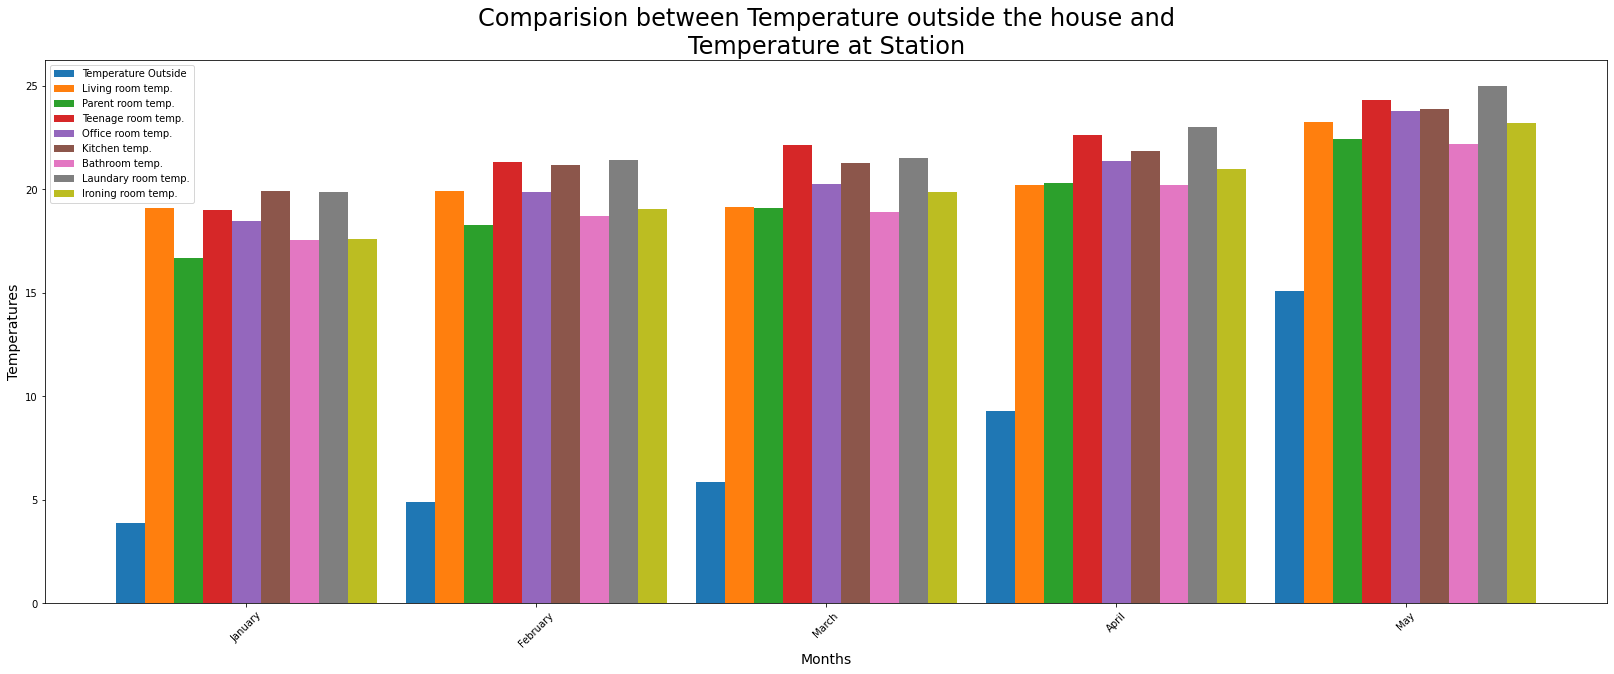

In [ ]:
plt.rcParams['figure.figsize'] = (28, 10)
x_axis = np.arange(5)
plt.subplot()
plt.bar(x_axis - 0.40, df.groupby(df['date'].dt.month).aggregate({'temp_out' : 'mean'})['temp_out'], width = 0.10, label = 'Temperature Outside')
plt.bar(x_axis - 0.30, df.groupby(df['date'].dt.month).aggregate({'temp_living' : 'mean'})['temp_living'], width = 0.10, label = 'Living room temp.')
plt.bar(x_axis - 0.20, df.groupby(df['date'].dt.month).aggregate({'temp_parent' : 'mean'})['temp_parent'], width = 0.10, label = 'Parent room temp.')
plt.bar(x_axis - 0.10, df.groupby(df['date'].dt.month).aggregate({'temp_teenage' : 'mean'})['temp_teenage'], width = 0.10, label = 'Teenage room temp.')
plt.bar(x_axis, df.groupby(df['date'].dt.month).aggregate({'temp_office' : 'mean'})['temp_office'], width = 0.10, label = 'Office room temp.')
plt.bar(x_axis + 0.10, df.groupby(df['date'].dt.month).aggregate({'temp_kitchen' : 'mean'})['temp_kitchen'], width = 0.10, label = 'Kitchen temp.')
plt.bar(x_axis + 0.20, df.groupby(df['date'].dt.month).aggregate({'temp_bath' : 'mean'})['temp_bath'], width = 0.10, label = 'Bathroom temp.')
plt.bar(x_axis + 0.30, df.groupby(df['date'].dt.month).aggregate({'temp_laundry' : 'mean'})['temp_laundry'], width = 0.10, label = 'Laundary room temp.')
plt.bar(x_axis + 0.40, df.groupby(df['date'].dt.month).aggregate({'temp_ironing' : 'mean'})['temp_ironing'], width = 0.10, label = 'Ironing room temp.')
plt.xticks(rotation = 45, ticks=[0,1,2,3,4], labels = ['January','February','March','April','May'], fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(prop = {'size' : 10})
plt.title('Comparision between Temperature outside the house and\nTemperature at Station', fontsize = 24)
plt.xlabel('Months', fontsize = 14)
plt.ylabel('Temperatures', fontsize = 14)
plt.show()

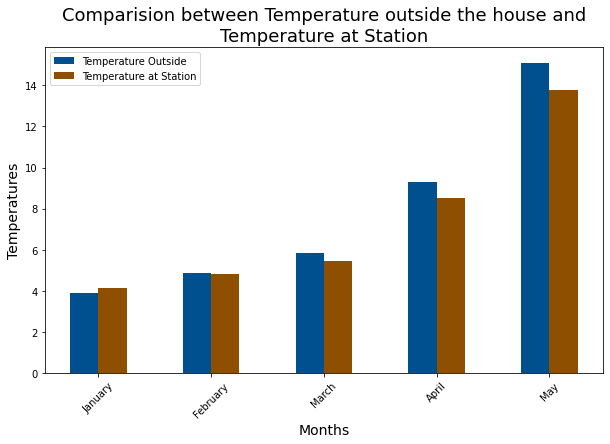

In [ ]:
#Temperature outside VS Temperature at Station
plt.rcParams['figure.figsize'] = (10, 6)
x_axis = np.arange(5)
plt.subplot()
plt.bar(x_axis - 0.125, df.groupby(df['date'].dt.month).aggregate({'temp_out' : 'mean'})['temp_out'], width = 0.25, label = 'Temperature Outside', color = '#004f8f')
plt.bar(x_axis + 0.125, df.groupby(df['date'].dt.month).aggregate({'temp_station' : 'mean'})['temp_station'], width = 0.25, label = 'Temperature at Station', color = '#8f4f00')
plt.xticks(rotation = 45, ticks=[0,1,2,3,4], labels = ['January','February','March','April','May'], fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(prop = {'size' : 10})
plt.title('Comparision between Temperature outside the house and\nTemperature at Station', fontsize = 18)
plt.xlabel('Months', fontsize = 14)
plt.ylabel('Temperatures', fontsize = 14)
plt.show()

#### Bivariate Analysis

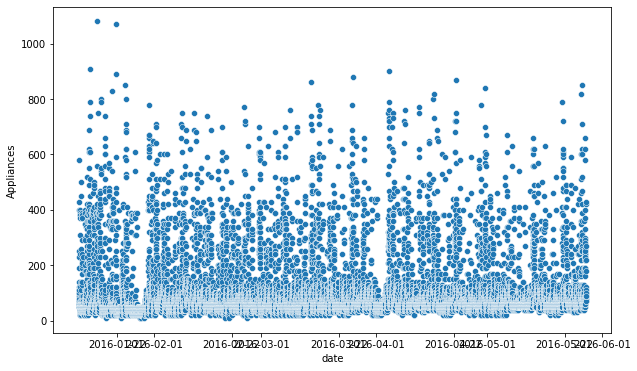

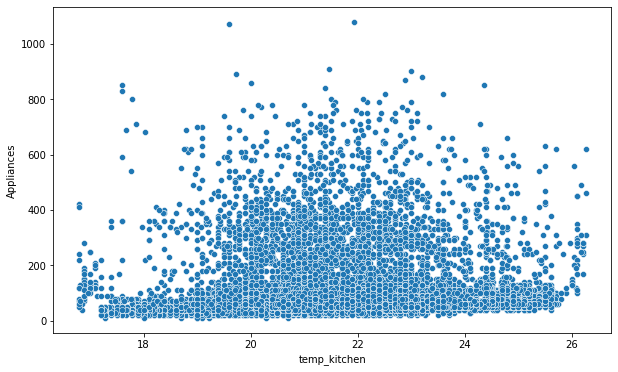

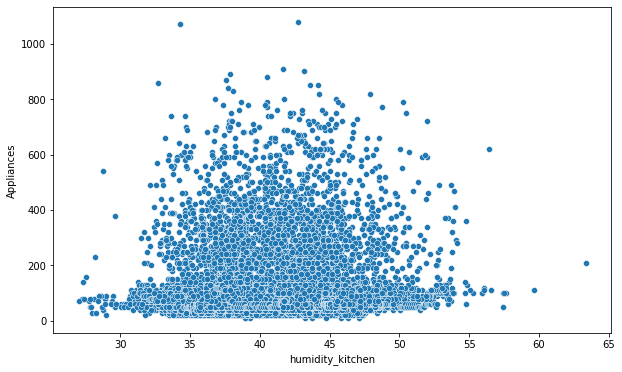

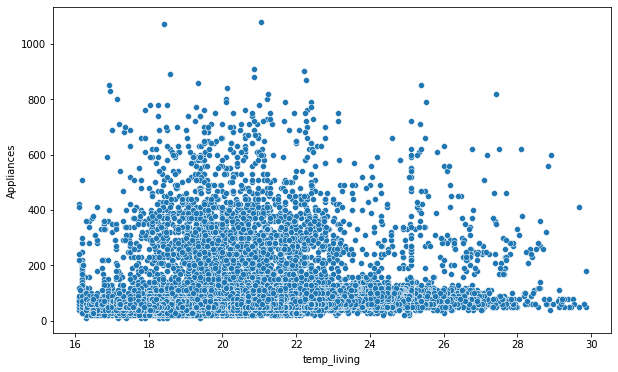

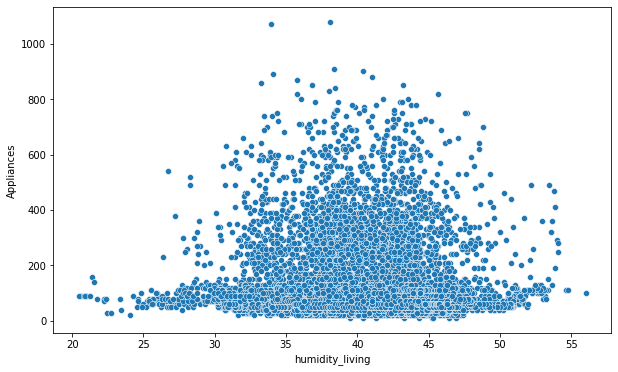

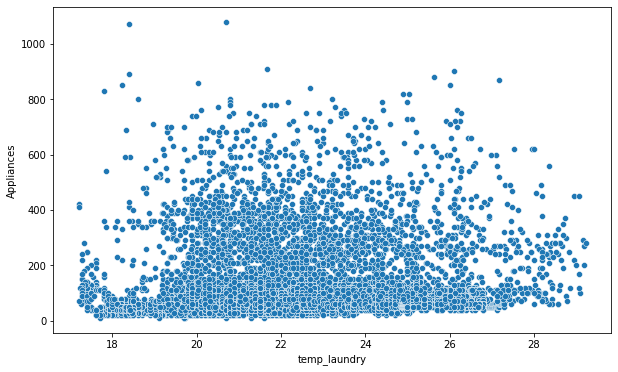

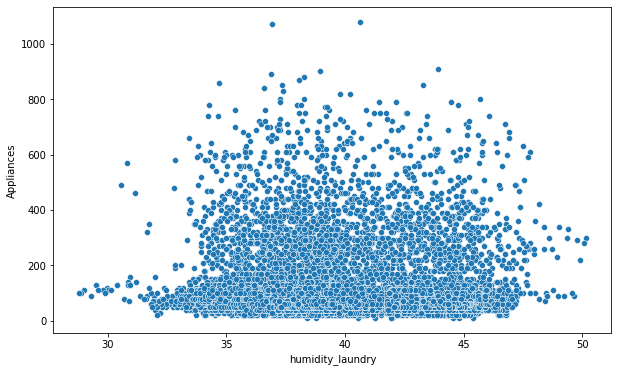

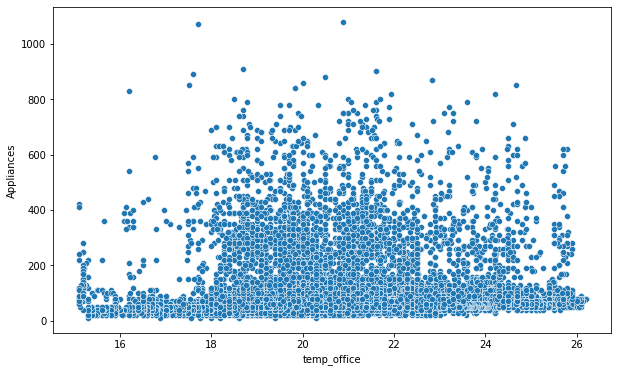

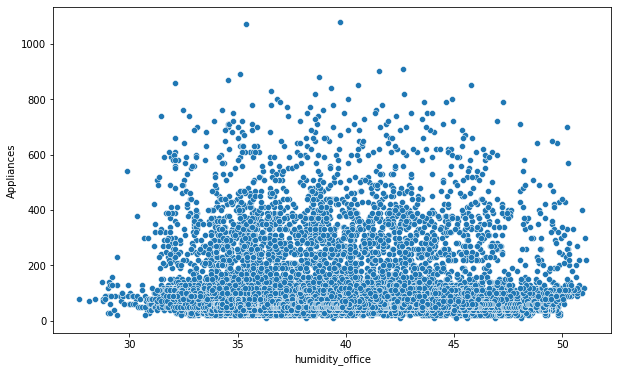

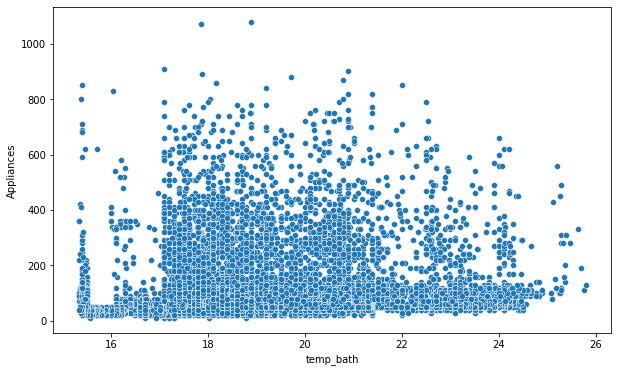

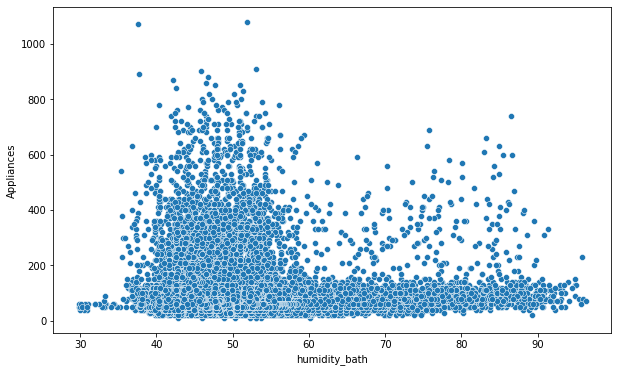

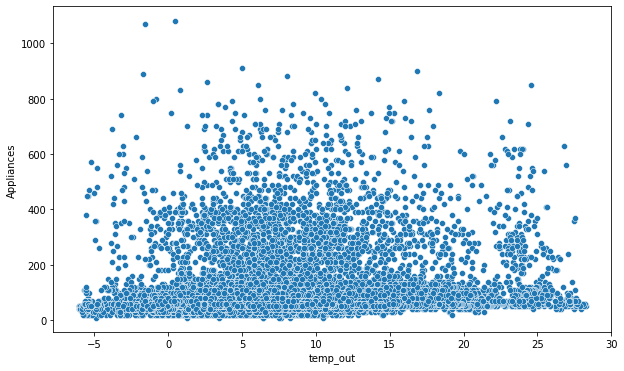

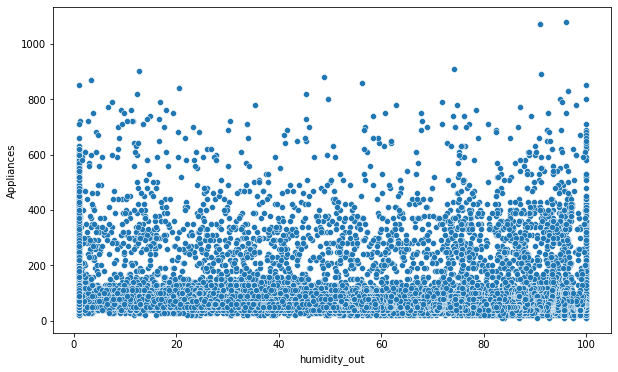

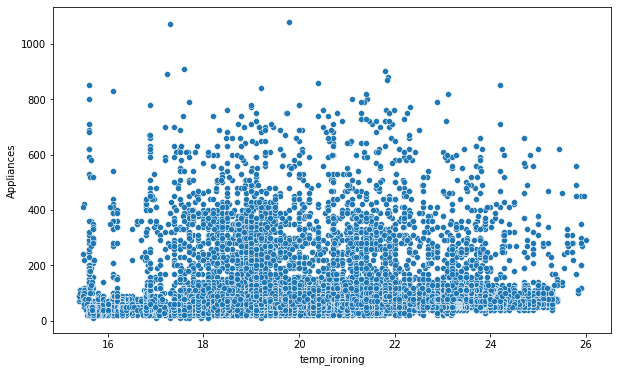

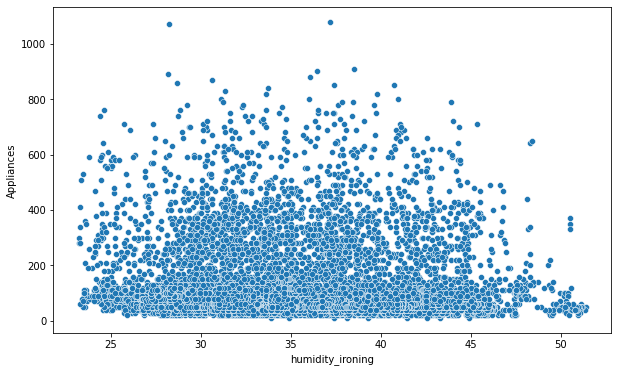

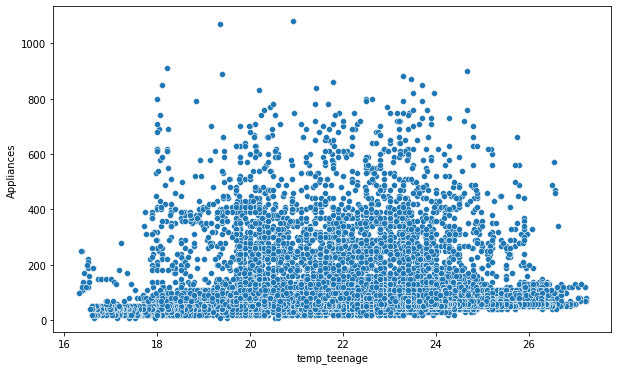

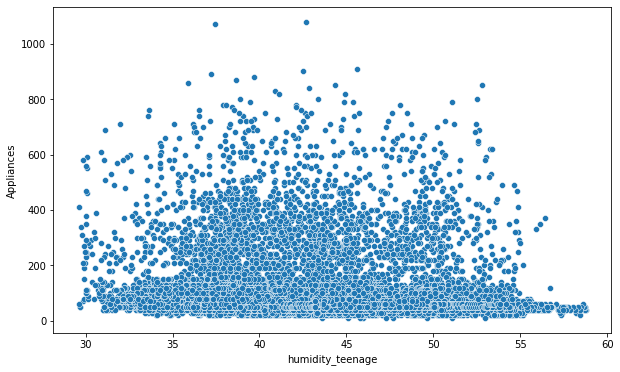

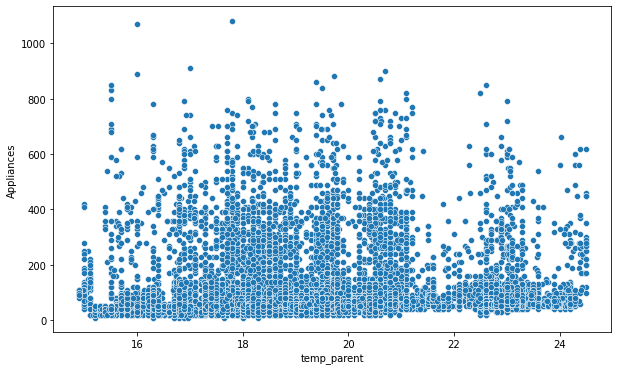

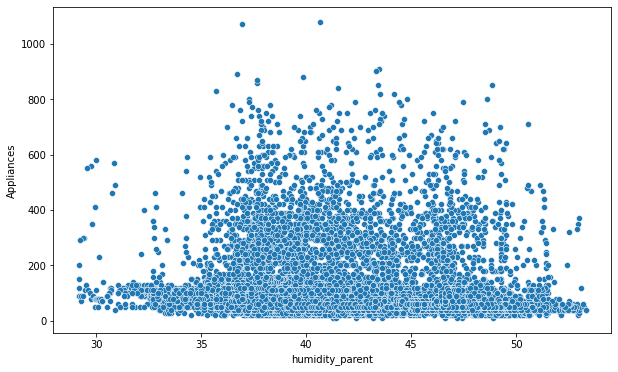

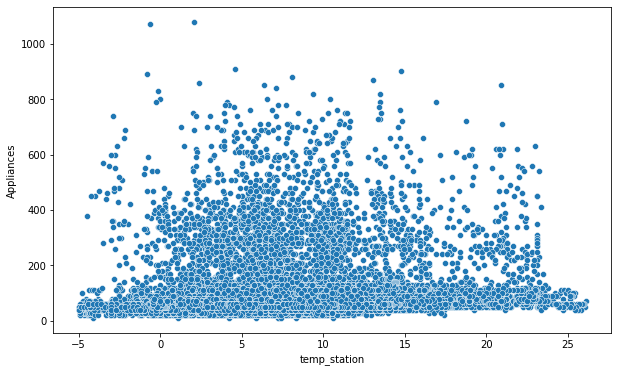

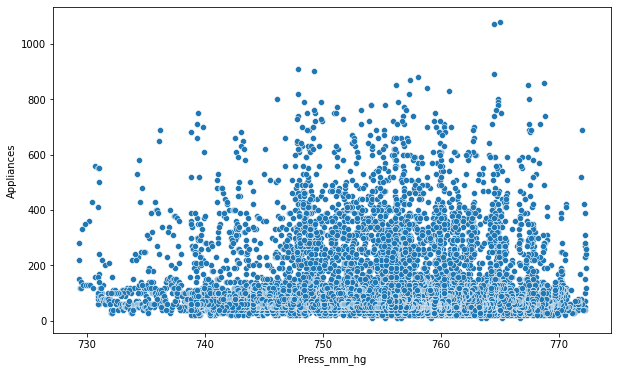

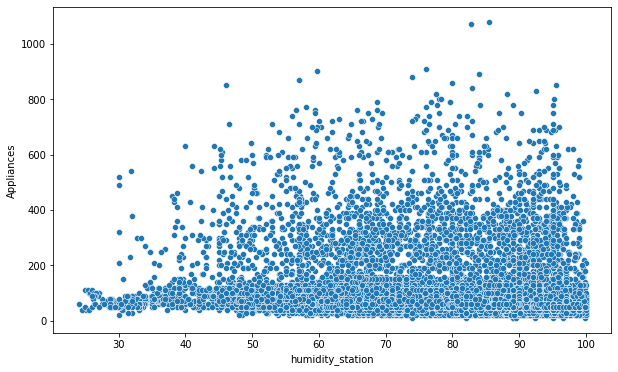

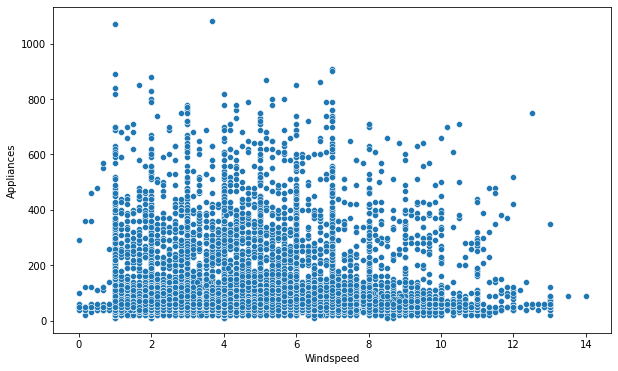

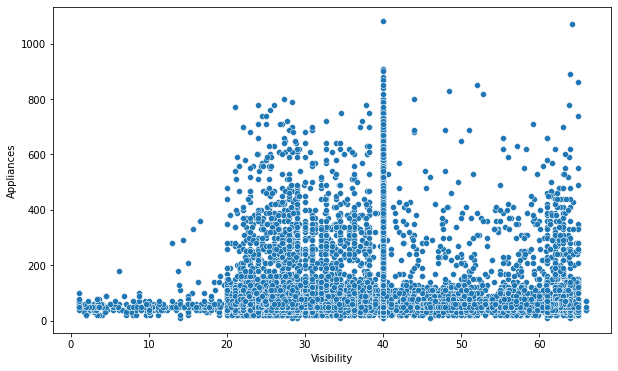

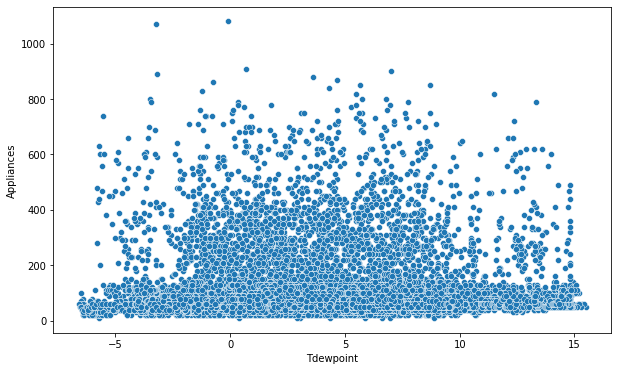

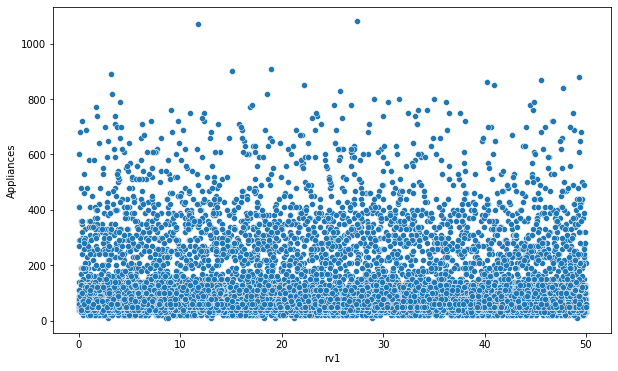

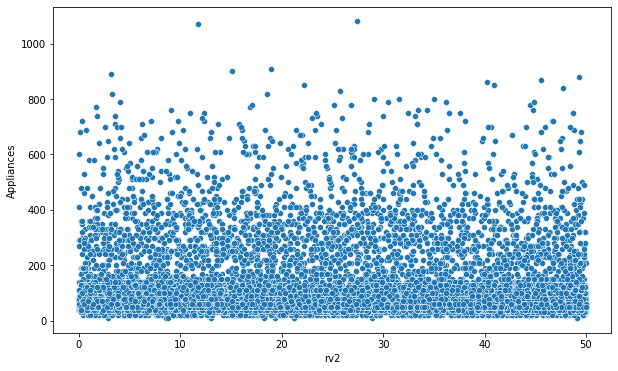

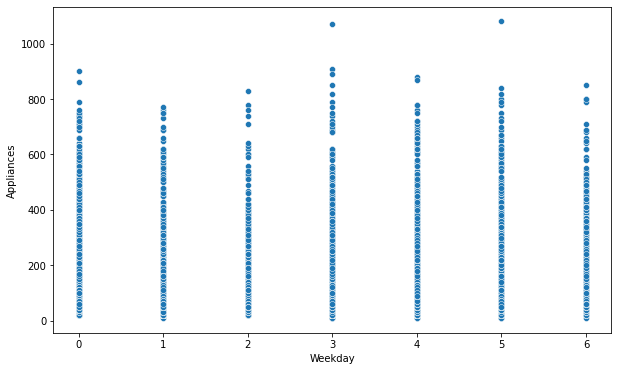

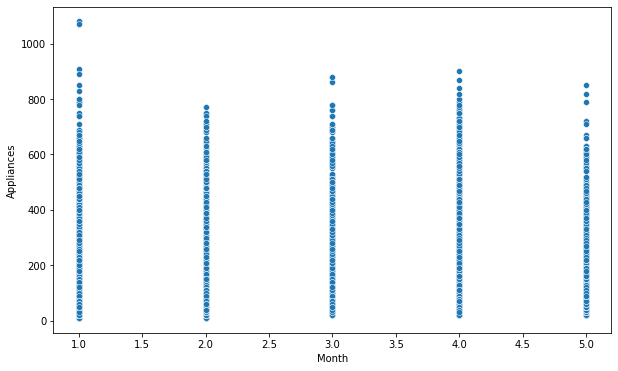

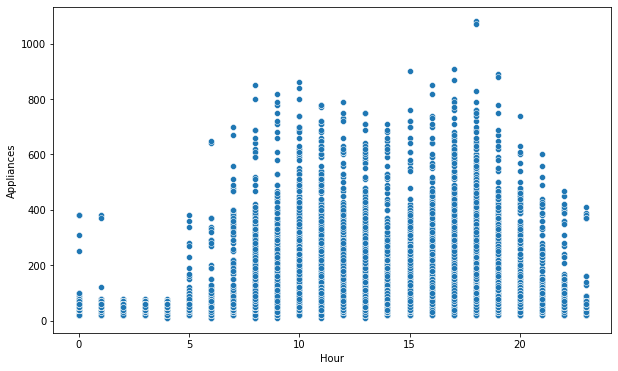

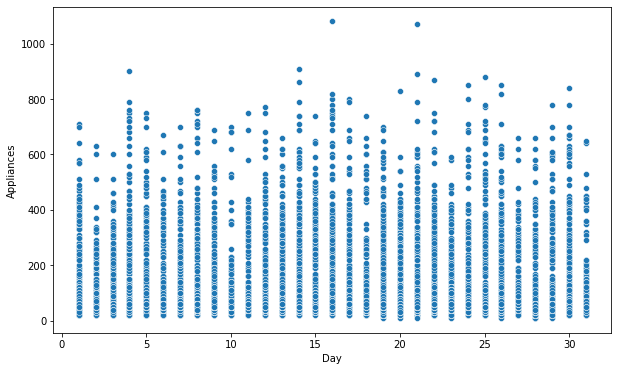

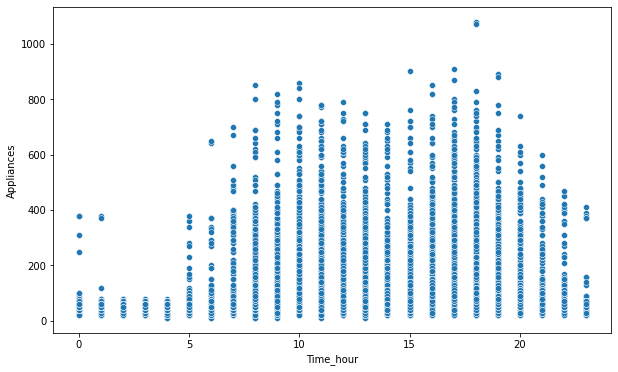

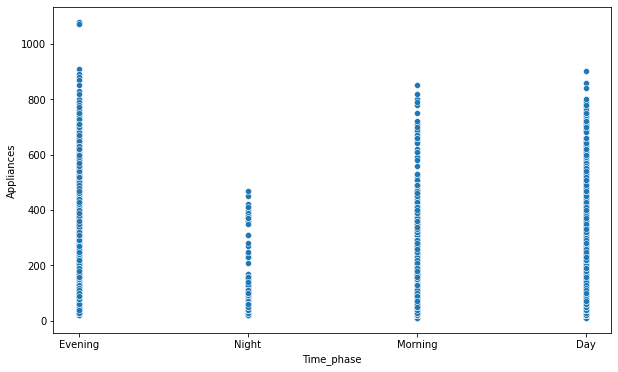

In [ ]:
for i, predictor in enumerate(df1.drop(columns=['Appliances'])):
    plt.figure(i)
    sns.scatterplot(data=df1, x=predictor,y='Appliances')

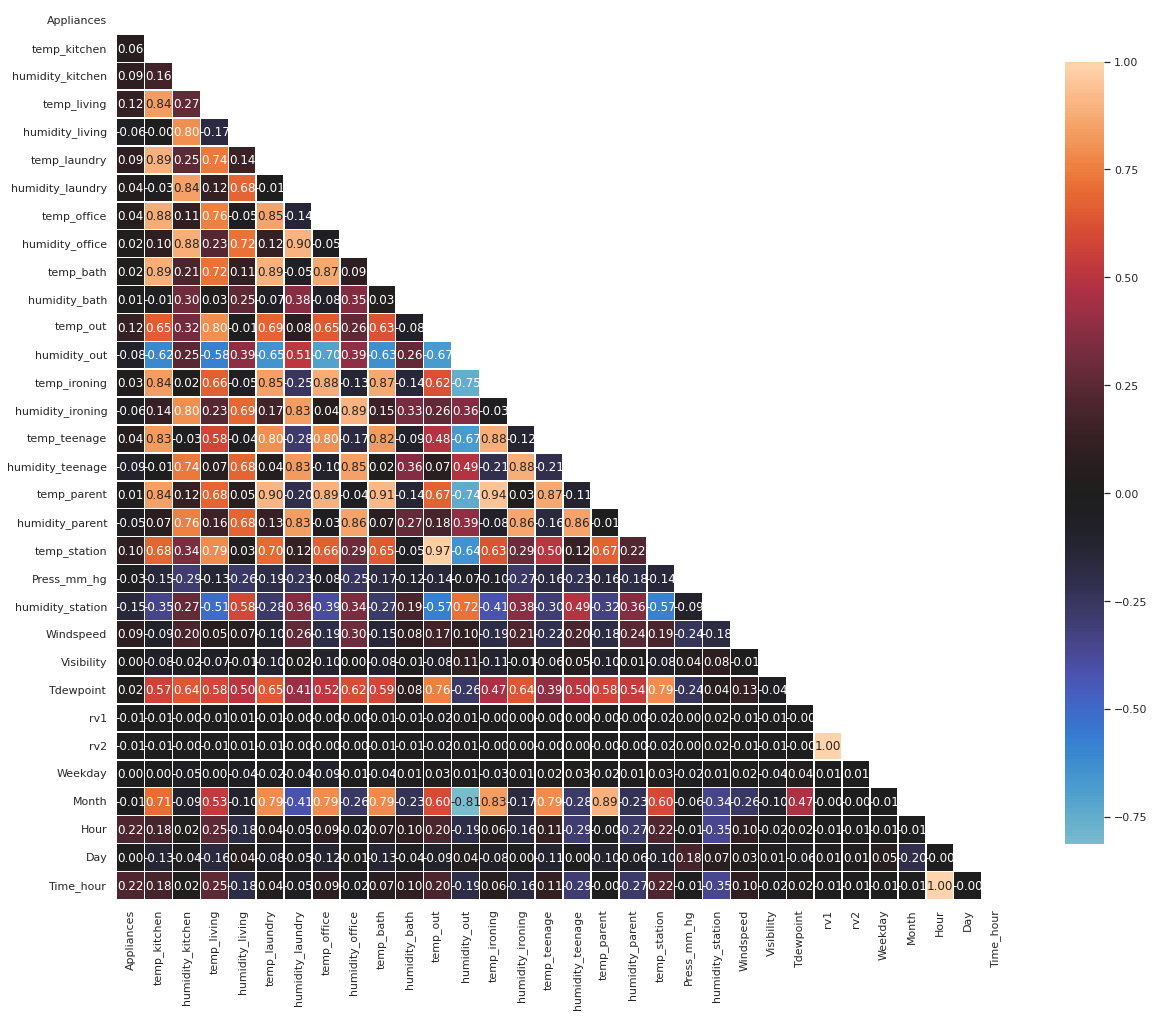

In [ ]:

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,18))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,annot=True,mask=mask,fmt=".2f", vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink":0.8})

* The Target variable 'Appliances' don't have a good correlation of any of features column
* The columns'rv1' and 'visiblity' have very low correlation with other variables
* The temperature variables have a good postive correation among themselves.


### Modelling

In [ ]:
# We have all the values in rv1 same as rv2
# Hence we can drop it
(df['rv1']==df['rv2']).unique()

array([ True])

In [ ]:
# Dropping the rv2 column and renaming rv1 as Random_Variable
df = df.drop(['rv2','date'],axis=1).rename(columns={'rv1':'Random variable'})

In [ ]:
# Segregation of dataset into training and testing set

# train,test = train_test_split(df,test_size=0.05,random_state=42) 

#### Outlier Treatment

In [ ]:
# Outlier removal fuction
def remove_outlier(df):
  
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df

# Run twice for best results.
train_series = remove_outlier(df.Appliances)
temp_df = pd.DataFrame(train_series)
ind_diff= df.index.difference(temp_df.index)

for i in range(0, len(ind_diff),1):
    df = df.drop([ind_diff[i]])
    

####Feature Selection

In [ ]:
feature_selection = DecisionTreeRegressor()
feature_selection.fit(df[[col for col in df.columns if col not in ['Appliances']]],df['Appliances'])
feature_selection.feature_importances_

array([0.01648654, 0.02492518, 0.02182128, 0.02521181, 0.01858003,
       0.02200178, 0.02256982, 0.01828884, 0.01673739, 0.02467847,
       0.01872477, 0.02606809, 0.01491674, 0.01963998, 0.07084838,
       0.02254027, 0.03093237, 0.02243819, 0.02092963, 0.02916984,
       0.02418558, 0.01447832, 0.01576539, 0.0269749 , 0.02292452,
       0.02486391, 0.01021538, 0.34721572, 0.02586687])

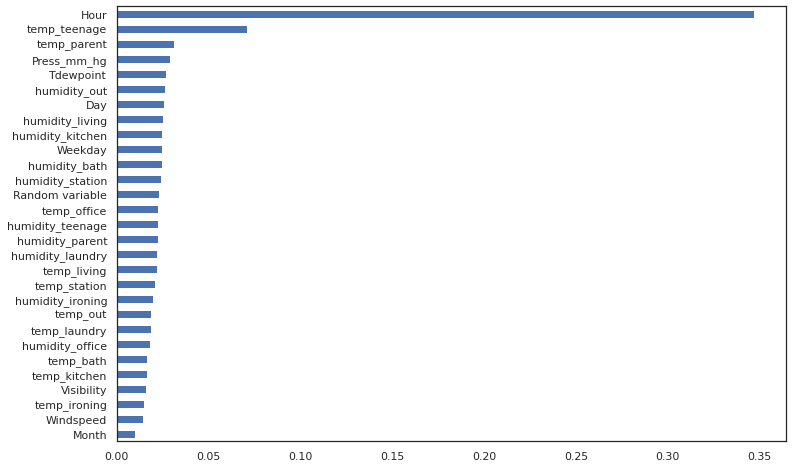

In [ ]:
index = [col for col in df.columns if col not in ['Appliances']]

plt.figure(figsize=(12,8))
feat_importances = pd.Series(feature_selection.feature_importances_,index = index)
feat_importances.sort_values(ascending = True).plot(kind="barh")
plt.show()

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate variance inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[col for col in df.columns if col not in ['Appliances']]])

variables          VIF
0       temp_kitchen  3925.113614
1   humidity_kitchen  1971.572360
2        temp_living  2661.945643
3    humidity_living  2421.806508
4       temp_laundry  1616.276200
5   humidity_laundry  1943.405826
6        temp_office  1031.404357
7    humidity_office  1486.476365
8          temp_bath  1236.564223
9      humidity_bath    46.627998
10          temp_out    87.464811
11      humidity_out    55.072397
12      temp_ironing  1736.759617
13  humidity_ironing   510.045937
14      temp_teenage  1031.767875
15  humidity_teenage   632.190161
16       temp_parent  2978.385208
17   humidity_parent   736.555461
18      temp_station   418.114659
19       Press_mm_hg  2209.290560
20  humidity_station  1415.018404
21         Windspeed     5.278457
22        Visibility    11.760090
23         Tdewpoint   135.257283
24   Random variable     3.972035
25           Weekday     3.657909
26             Month   106.469719
27              Hour     7.165932
28               Day     7.287416

In [ ]:
calc_vif(df[[col for col in df.columns if col not in ['Appliances','humidity_station','Press_mm_hg','temp_parent','temp_teenage','temp_ironing','humidity_office',
                                        
                                                      'temp_bath','temp_kitchen','humidity_kitchen','temp_living','humidity_living','temp_laundry','humidity_laundry',
                                                      'humidity_parent','humidity_teenage','humidity_ironing','temp_office']]])

variables        VIF
0     humidity_bath  31.419728
1          temp_out  55.506340
2      humidity_out  14.182039
3      temp_station  69.419347
4         Windspeed   4.703922
5        Visibility  10.882647
6         Tdewpoint   6.963568
7   Random variable   3.925085
8           Weekday   3.263597
9             Month  12.619259
10             Hour   4.062380
11              Day   4.347100

In [ ]:
# #Extracting the features which are highly correlated with thresold value 80%
# num=[i for i in df.columns if df[i].dtypes !="O"]
# col_corr=set()
# for i in range(len(df[num].columns)):
#     corr_matrix=df[num].corr(method='pearson')
#     for j in range(i):
#         if corr_matrix.iloc[i,j] > 0.80:
#             colname=corr_matrix.columns[i]
#             col_corr.add(colname)
# print (col_corr)

#### Scaling and Train validation split

In [ ]:
# Train Test Spitting
scaler = MinMaxScaler()
X = df[[col for col in df.columns if col not in ['Appliances']]] #,'humidity_station','Press_mm_hg','temp_parent','temp_teenage','temp_ironing','humidity_office',
                                                    #   'temp_bath','temp_kitchen','humidity_kitchen','temp_living','humidity_living','temp_laundry','humidity_laundry',
                                                    # 'humidity_parent','humidity_teenage','humidity_ironing','temp_office']]]
y = df['Appliances']

X_scale = scaler.fit_transform(X)
y_scale = scaler.fit_transform(y.values.reshape([-1,1])).flatten()

X_train,X_val,y_train,y_val = train_test_split(X_scale,y_scale,test_size = 0.3, random_state = 0)

# X_test = test[[col for col in df.columns if col not in ['Appliances','humidity_station','Press_mm_hg','temp_parent','temp_teenage','temp_ironing','humidity_office',
#                                                       'temp_bath','temp_kitchen','humidity_kitchen','temp_living','humidity_living','temp_laundry','humidity_laundry',
#                                                       'humidity_parent','humidity_teenage','humidity_ironing','temp_office']]]
# y_test = test['Appliances']

#### Optimised Code

In [ ]:
def models():
    models = dict()
    models['Linear Regression'] = LinearRegression()
    models['knn'] = KNeighborsRegressor()
    models['Decision Tree'] = DecisionTreeRegressor()
    models['SVM'] = SVR()
    models['XGBoost'] = XGBRegressor()
    models['Extra Trees Regressor'] = ExtraTreesRegressor()
    models['Random Forest'] = RandomForestRegressor()
    models['Bagging Regressor'] = BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=3))
#     models['stacking'] = new_stacking()
    return models

In [ ]:
def model_predictions(models,X_train,X_val,y_train):
    names=[]
    training_preds = []
    validation_preds = []
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train).tolist()
        training_preds.append(train_pred)
        names.append(name)
        
        val_pred = model.predict(X_val).tolist()
        validation_preds.append(val_pred)
            
    training_pred_dict = dict(zip(names, training_preds))
    train_pred_df = pd.DataFrame.from_dict(training_pred_dict)
    
    validation_pred_dict = dict(zip(names, validation_preds))
    val_pred_df = pd.DataFrame.from_dict(validation_pred_dict)
    
    return train_pred_df,val_pred_df

In [ ]:
def evaluation_function(y_train,y_val, train_pred_df, val_pred_df, metric_name):

    models = train_pred_df.columns.tolist()

    metrics_train = []
    metrics_val = []
    for model in models:
        if metric_name == 'MSE':
            metric_train = mean_squared_error(y_train, train_pred_df[model])  
            metric_val = mean_squared_error(y_val, val_pred_df[model])  
        elif metric_name == 'RMSE':
            metric_train = mean_squared_error(y_train, train_pred_df[model], squared=False)
            metric_val = mean_squared_error(y_val, val_pred_df[model],squared=False)  
        elif metric_name == 'RMSLE':
            metric_train = metrics.mean_squared_log_error(y_train, train_pred_df[model], squared=False)
            metric_val = metrics.mean_squared_log_error(y_val, val_pred_df[model],squared=False)  
        elif metric_name == 'r2_score':
            metric_train = r2_score(y_train, train_pred_df[model])
            metric_val = r2_score(y_val, val_pred_df[model])
        metrics_train.append(metric_train)
        metrics_val.append(metric_val)

    metrics_train_dict = dict(zip(models, metrics_train))
    metrics_val_dict = dict(zip(models,metrics_val))
    
    metrics_dict={'train':metrics_train_dict,
                 'test':metrics_val_dict}
    metrics_df = pd.DataFrame(metrics_dict)
    metrics_df = metrics_df.transpose()
    metrics_df['Evaluation'] = metric_name
    first_col = metrics_df.pop('Evaluation')
    metrics_df.insert(0, 'Evaluation', first_col)
    return metrics_df

In [ ]:
train_pred_df,val_pred_df = model_predictions(models(),X_train,X_val,y_train)

[18:20:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
train_pred_df

Linear Regression     knn  Decision Tree       SVM   XGBoost  \
0               0.376356  0.2375         0.2500  0.221758  0.249104   
1               0.409505  0.3250         0.2500  0.341993  0.430334   
2               0.321943  0.2000         0.2500  0.226100  0.282305   
3               0.439264  0.5000         0.5625  0.515277  0.398396   
4               0.373782  0.2750         0.1875  0.287671  0.329647   
...                  ...     ...            ...       ...       ...   
12312           0.352592  0.3000         0.3125  0.365293  0.372118   
12313           0.565642  0.4625         0.6875  0.553318  0.618912   
12314           0.396475  0.4500         0.4375  0.466319  0.438547   
12315           0.501022  0.7000         0.5000  0.599827  0.458283   
12316           0.348783  0.4000         0.3125  0.377795  0.351895   

       Extra Trees Regressor  Random Forest  Bagging Regressor  
0                     0.2500       0.246250           0.237500  
1                     0.2500       0.284375           0.320833  
2                     0.2500       0.214375           0.191667  
3                     0.5625       0.536875           0.508333  
4                     0.1875       0.225000           0.252083  
...                      ...            ...                ...  
12312                 0.3125       0.315625           0.302083  
12313                 0.6875       0.668750           0.472917  
12314                 0.4375       0.440625           0.404167  
12315                 0.5000       0.570625           0.639583  
12316                 0.3125       0.370625           0.470833  

[12317 rows x 8 columns]

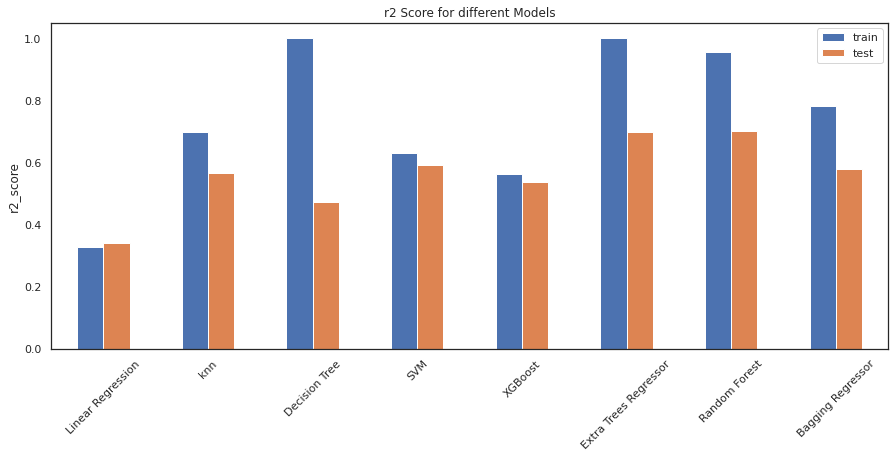

In [ ]:
r2 = evaluation_function(y_train,y_val,train_pred_df,val_pred_df,'r2_score')
r2.transpose().iloc[1:,:].plot(kind='bar',figsize=(15,6))
plt.ylabel('r2_score')
plt.title('r2 Score for different Models')
plt.xticks(rotation=45)
plt.show()

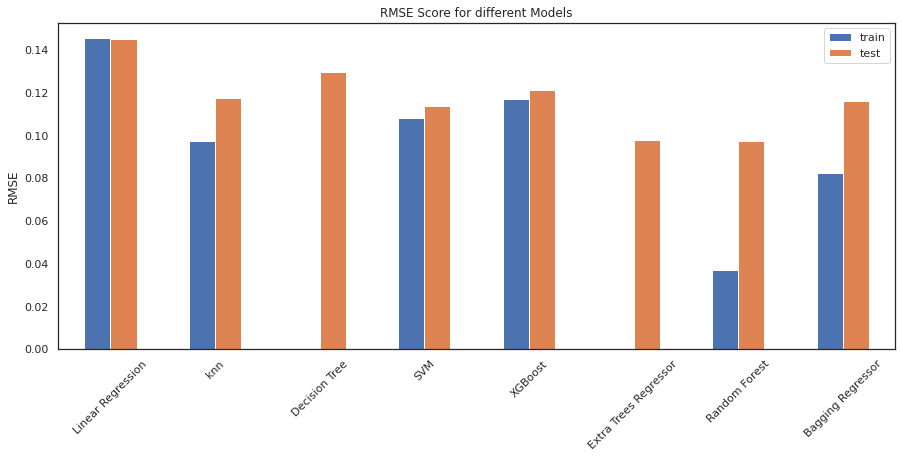

In [ ]:
RMSE = evaluation_function(y_train,y_val,train_pred_df,val_pred_df,'RMSE')
RMSE.transpose().iloc[1:,:].plot(kind='bar',figsize=(15,6))
plt.ylabel('RMSE')
plt.title('RMSE Score for different Models')
plt.xticks(rotation=45)
plt.show()

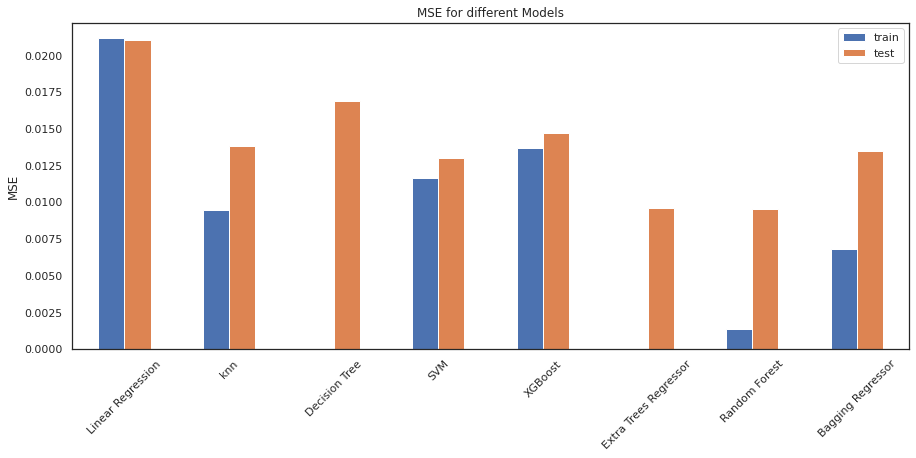

In [ ]:
MSE = evaluation_function(y_train,y_val,train_pred_df,val_pred_df,'MSE')
MSE.transpose().iloc[1:,:].plot(kind='bar',figsize=(15,6))
plt.ylabel('MSE')
plt.title('MSE for different Models')
plt.xticks(rotation=45)
plt.show()

### Hyperparameter Tuning

* Hyperparameter tuning for ExtraTreesRegressor

In [ ]:
# param_grid = [{
#               'max_depth': [80, 150, 200,250],
#               'n_estimators' : [100,150,200,250],
#               'max_features': ["auto", "sqrt", "log2"]
#             }]

param_grid = [{
    'max_depth' : [80, 100, 110, 120],
    'max_features': [7, 9, 11, 13, 15],
    'min_samples_split' : [6, 8, 9, 10, 12],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'n_estimators': [2000]
}]


ext_reg = ExtraTreesRegressor()
ext_reg_random = RandomizedSearchCV(estimator = ext_reg, param_distributions = param_grid, cv = 10,n_iter=10,random_state=42, n_jobs = -1 , scoring='r2' , verbose=3)
ext_reg_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=ExtraTreesRegressor(), n_jobs=-1,
                   param_distributions=[{'max_depth': [80, 100, 110, 120],
                                         'max_features': [7, 9, 11, 13, 15],
                                         'min_samples_leaf': [1, 2, 3, 5, 7],
                                         'min_samples_split': [6, 8, 9, 10, 12],
                                         'n_estimators': [2000]}],
                   random_state=42, scoring='r2', verbose=3)

In [ ]:
ext_reg_random.best_estimator_

ExtraTreesRegressor(max_depth=120, max_features=7, min_samples_split=9,
                    n_estimators=2000)

In [ ]:
new_pred = ext_reg_random.best_estimator_.predict(X_val)

In [ ]:
# Displaying the Training Error
MSE_ext_train  = mean_squared_error(y_train, ext_reg_random.best_estimator_.predict(X_train))
print("Training MSE :" , MSE_ext_train)

RMSE_train_ext_random = np.sqrt(MSE_ext_train)
print("Training RMSE :" ,RMSE_train_ext_random)

r2_train_ext = r2_score(y_train, ext_reg_random.best_estimator_.predict(X_train))
print("Training R2 score :" ,r2_train_ext)
print("Trainig Adjusted R2 score: ",1-(1-r2_score(y_train, ext_reg_random.best_estimator_.predict(X_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),'\n','-*-'*50,'\n')



# Displaying the Validation Error
MSE_ext_val  = mean_squared_error(y_val, new_pred)
print("Validation MSE :" , MSE_ext_val)

RMSE_val_ext_random = np.sqrt(MSE_ext_val)
print("Validation RMSE :" ,RMSE_val_ext_random)

r2_val_ext = r2_score(y_val,ext_reg_random.best_estimator_.predict(X_val))
print("Validation R2 score :",r2_val_ext)
print("Validation Adjusted R2 score: ",1-(1-r2_score(y_val, ext_reg_random.best_estimator_.predict(X_val)))*((X_val.shape[0]-1)/(X_val.shape[0]-X_val.shape[1]-1)),'\n','-*-'*50,'\n')


# Displaying the Testing Error
MSE_ext_test  = mean_squared_error(y_test, ext_reg_random.best_estimator_.predict(X_test.values))
print("Testing MSE :" , MSE_ext_test)

RMSE_test_ext_random = np.sqrt(MSE_ext_test)
print("Testing RMSE :" ,RMSE_test_ext_random)

r2_test_ext = r2_score(y_test,ext_reg_random.best_estimator_.predict(X_test.values))
print("Testing R2 score :" ,r2_test_ext)
print("Testing Adjusted R2 score : ",1-(1-r2_score(y_test,ext_reg_random.best_estimator_.predict(X_test.values)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),'\n','-*-'*50,'\n')



Training MSE : 0.0035984581207460595
Training RMSE : 0.059987149630117115
Training R2 score : 0.8859682855395703
Trainig Adjusted R2 score:  0.8858609294235942 
 -*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Validation MSE : 0.01018341248761353
Validation RMSE : 0.10091289554667199
Validation R2 score : 0.6802382563435199
Validation Adjusted R2 score:  0.6795349211745094 
 -*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Testing MSE : 16780.78477442235
Testing RMSE : 129.54066841892686
Testing R2 score : -1.0573172070924173
Testing Adjusted R2 score :  -1.0805279653262803 
 -*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 



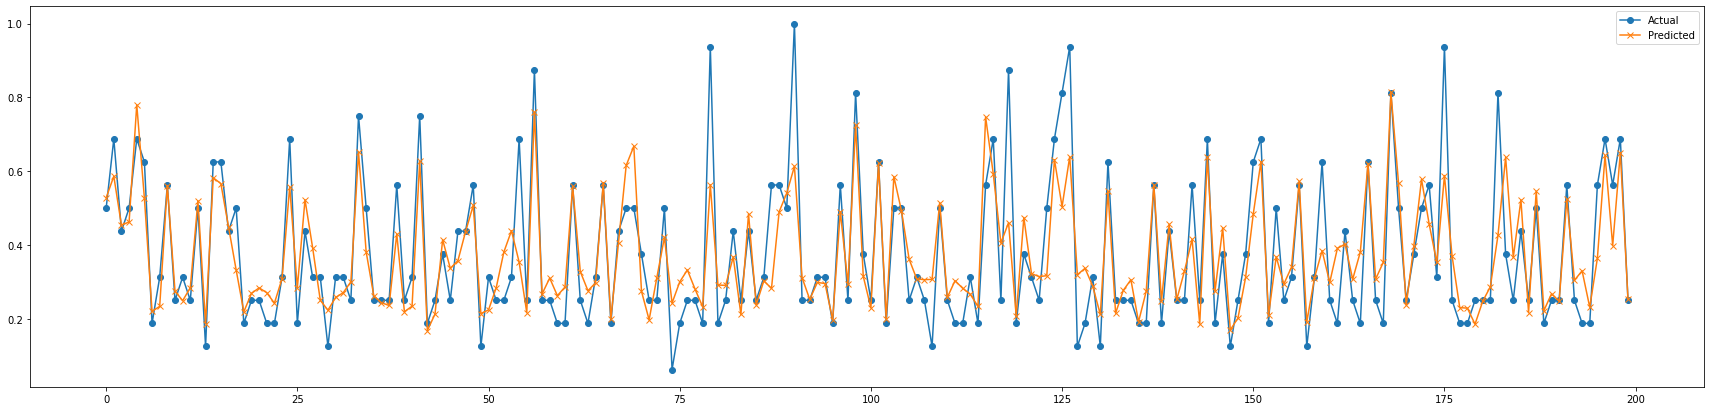

In [ ]:
plt.figure(figsize=(30,7))
plt.plot(np.array(y_val[:200]),marker='o')
plt.plot(np.array(new_pred[:200]),marker='x')
plt.legend(['Actual','Predicted'])
plt.show()

* Hyperparamater tuning for XGBoost Regressor

In [ ]:
# Number of trees 
n_estimators = [20,50,90,100,125,150,200,400,800]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [30,40,50,60,70,80,90,100]

# Minimum number of samples required to split a node
min_samples_split = [3, 4, 5,10]

# Learning rate
learning_rate = [np.linspace(0,1,num=20)]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
    
               'max_depth': max_depth,
               'model_learning_rate':learning_rate,
               'booster' : ['gblinear','gbtree','dart']
               }
xgb_reg = XGBRegressor()
xgb_reg_random = RandomizedSearchCV(estimator=xgb_reg, param_distributions = random_grid,n_iter=10,random_state=42,cv=10,n_jobs=-1,verbose=2,scoring='neg_mean_squared_error')


In [ ]:
xgb_reg_random.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[10:35:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=10, estimator=XGBRegressor(), n_jobs=-1,
                   param_distributions={'booster': ['gblinear', 'gbtree',
                                                    'dart'],
                                        'max_depth': [30, 40, 50, 60, 70, 80,
                                                      90, 100],
                                        'model_learning_rate': [array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])],
                                        'n_estimators': [20, 50, 90, 100, 125,
                                                         150, 200, 400, 800]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
xgb_reg_random.best_estimator_

XGBRegressor(max_depth=30,
             model_learning_rate=array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
             n_estimators=50)

In [ ]:
# Displaying the Training Error
MSE_xgb_train  = mean_squared_error(y_train,xgb_reg_random.best_estimator_.predict(X_train))
print("Training MSE :" , MSE_xgb_train)

RMSE_train_bagging = np.sqrt(MSE_xgb_train)
print("Training RMSE :" ,RMSE_train_bagging)

r2_train_xgb = r2_score(y_train, xgb_reg_random.best_estimator_.predict(X_train))
print("Training R2 score :" ,r2_train_xgb)
print("Trainig Adjusted R2 score: ",1-(1-r2_score(y_train,xgb_reg_random.best_estimator_.predict(X_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),'\n','-*-'*50,'\n')



# Displaying the Validation Error
MSE_xgb_val  = mean_squared_error(y_val,xgb_reg_random.best_estimator_.predict(X_val))
print("Validation MSE :" , MSE_xgb_val)

RMSE_val_xgb_random = np.sqrt(MSE_xgb_val)
print("Validation RMSE :" ,RMSE_val_xgb_random)

r2_val_xgb = r2_score(y_val,xgb_reg_random.best_estimator_.predict(X_val))
print("Validation R2 score :" ,r2_val_xgb)
print("Validation Adjusted R2 score: ",1-(1-r2_score(y_val,xgb_reg_random.best_estimator_.predict(X_val)))*((X_val.shape[0]-1)/(X_val.shape[0]-X_val.shape[1]-1)),'\n','-*-'*50,'\n')


# Displaying the Testing Error
MSE_xgb_test  = mean_squared_error(y_test, xgb_reg_random.best_estimator_.predict(X_test.values))
print("Testing MSE :" , MSE_xgb_test)

RMSE_test_xgb_random = np.sqrt(MSE_xgb_test)
print("Testing RMSE :" ,RMSE_test_xgb_random)

r2_test_xgb = r2_score(y_test,xgb_reg_random.best_estimator_.predict(X_test.values))
print("Testing R2 score :" ,r2_test_xgb)
print("Testing Adjusted R2 score : ",1-(1-r2_score(y_test,xgb_reg_random.best_estimator_.predict(X_test.values)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),'\n','-*-'*50,'\n')



Training MSE : 3.358794063526605e-05
Training RMSE : 0.00579551038608905
Training R2 score : 0.9989356301150892
Trainig Adjusted R2 score:  0.9989346280551155 
 -*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Validation MSE : 0.011735198350807935
Validation RMSE : 0.10832912051155928
Validation R2 score : 0.63151178532999
Validation Adjusted R2 score:  0.6307012733601098 
 -*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Testing MSE : 16727.208819750558
Testing RMSE : 129.3337110723672
Testing R2 score : -1.0507488174184916
Testing Adjusted R2 score :  -1.073885470743213 
 -*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 



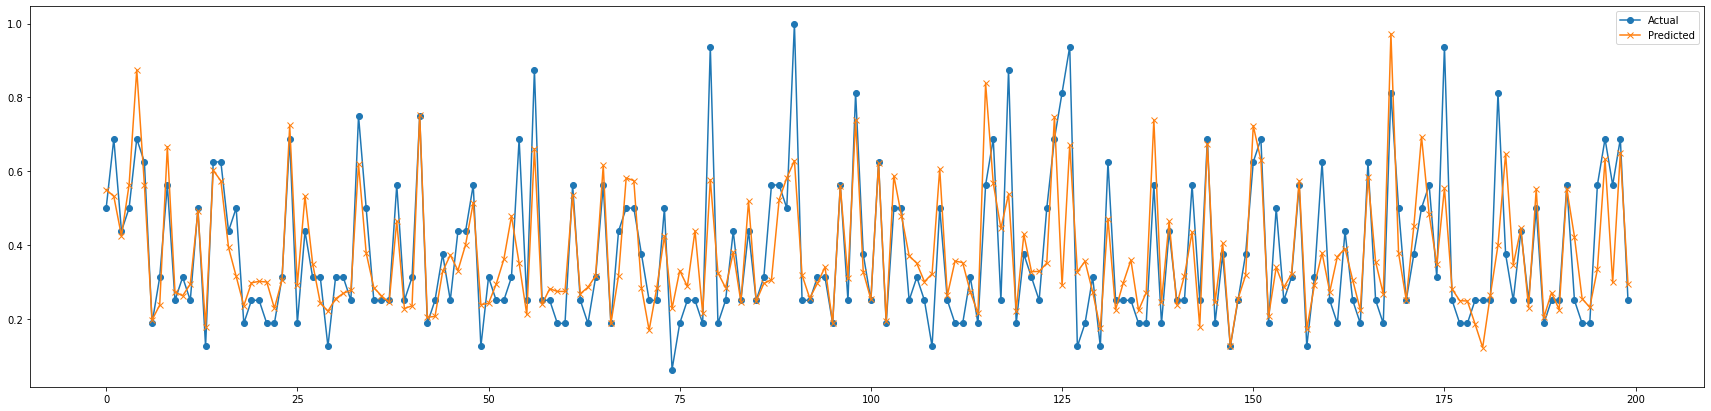

In [ ]:
plt.figure(figsize=(30,7))
plt.plot(np.array(y_val[:200]),marker='o')
plt.plot(np.array(xgb_reg_random.best_estimator_.predict(X_val)[:200]),marker='x')
plt.legend(['Actual','Predicted'])
plt.show()

* Hyperparameter Tuning for Random Forest Regressor

In [ ]:

# Number of trees in random forest
n_estimators = [20,50,90,100,125,150,200]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [2,5,9,15,25,35,40]

# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split}

param_grid = [{  'bootstrap': [True],
    'max_depth': [80,100,110,120],
    'max_features': [7, 9, 11, 13, 15],
    'min_samples_leaf': [2,3, 4, 5,8,9],
    'min_samples_split': [2,3,8, 10, 12,15,20],
    'n_estimators': [1000,2000]}]

rf_reg = RandomForestRegressor()
rf_reg_random = RandomizedSearchCV(estimator=rf_reg, param_distributions = param_grid,cv=10,n_iter=10,random_state=42,n_jobs=-1,verbose=2,scoring='neg_mean_squared_error')

In [ ]:
rf_reg_random.fit(X_train,y_train)
rf_reg_random.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomForestRegressor(max_depth=110, max_features=7, min_samples_leaf=3,
                      min_samples_split=10, n_estimators=1000)

In [ ]:


# Displaying the Training Error
MSE_rf_train  = mean_squared_error(y_train,rf_reg_random.best_estimator_.predict(X_train))
print("Training MSE :" , MSE_rf_train)

RMSE_train_bagging = np.sqrt(MSE_rf_train)
print("Training RMSE :" ,RMSE_train_bagging)

r2_train_rf = r2_score(y_train,rf_reg_random.best_estimator_.predict(X_train))
print("Training R2 score :" ,r2_train_rf)
print("Trainig Adjusted R2 score: ",1-(1-r2_score(y_train,rf_reg_random.best_estimator_.predict(X_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),'\n','-*-'*50,'\n')



# Displaying the Validation Error
MSE_rf_val  = mean_squared_error(y_val,rf_reg_random.best_estimator_.predict(X_val))
print("Validation MSE :" , MSE_rf_val)

RMSE_val_rf_random = np.sqrt(MSE_rf_val)
print("Validation RMSE :" ,RMSE_val_rf_random)

r2_val_rf = r2_score(y_val,rf_reg_random.best_estimator_.predict(X_val))
print("Validation R2 score :" ,r2_val_rf)
print("Validation Adjusted R2 score: ",1-(1-r2_score(y_val,rf_reg_random.best_estimator_.predict(X_val)))*((X_val.shape[0]-1)/(X_val.shape[0]-X_val.shape[1]-1)),'\n','-*-'*50,'\n')


# Displaying the Testing Error
MSE_rf_test  = mean_squared_error(y_test, rf_reg_random.best_estimator_.predict(X_test))
print("Testing MSE :" , MSE_rf_test)

RMSE_test_rf_random = np.sqrt(MSE_rf_test)
print("Testing RMSE :" ,RMSE_test_rf_random)

r2_test_rf = r2_score(y_test,rf_reg_random.best_estimator_.predict(X_test))
print("Testing R2 score :" ,r2_test_rf)
print("Testing Adjusted R2 score : ",1-(1-r2_score(y_test,rf_reg_random.best_estimator_.predict(X_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),'\n','-*-'*50,'\n')



Training MSE : 0.004804638671331
Training RMSE : 0.06931550094553887
Training R2 score : 0.8477455713890137
Trainig Adjusted R2 score:  0.8476022301775519 
 -*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Validation MSE : 0.01071262998370159
Validation RMSE : 0.10350183565377762
Validation R2 score : 0.6636206922874172
Validation Adjusted R2 score:  0.6628808057877493 
 -*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Testing MSE : 16786.802832948182
Testing RMSE : 129.563894789205
Testing R2 score : -1.0580550185550464
Testing Adjusted R2 score :  -1.0812741008156674 
 -*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 



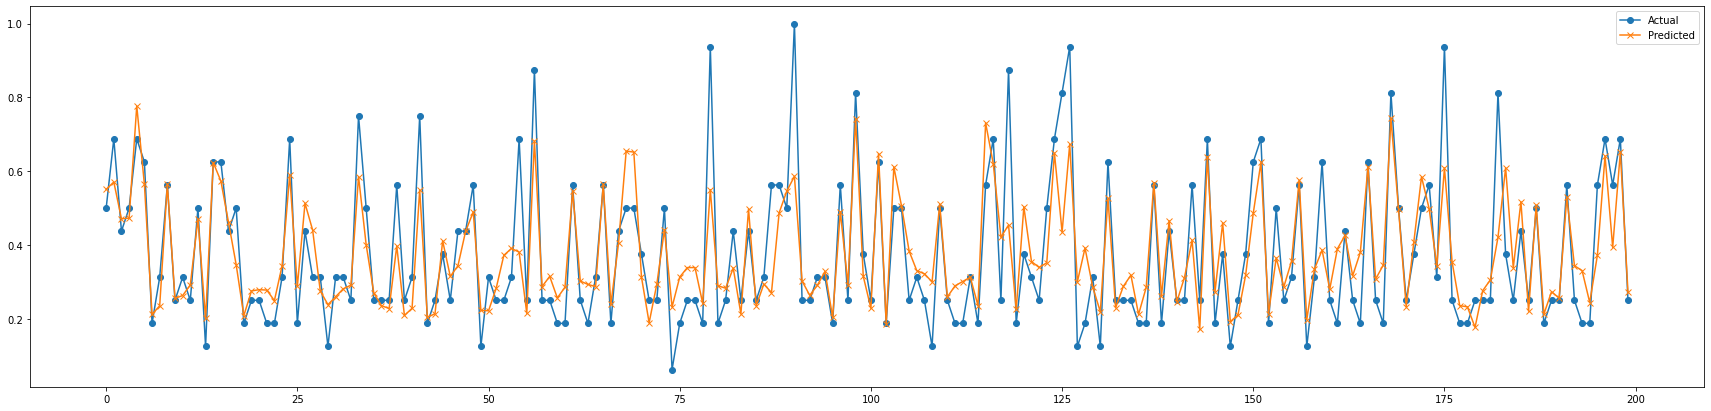

In [ ]:
plt.figure(figsize=(30,7))
plt.plot(np.array(y_val[:200]),marker='o')
plt.plot(np.array(rf_reg_random.best_estimator_.predict(X_val)[:200]),marker='x')
plt.legend(['Actual','Predicted'])
plt.show()

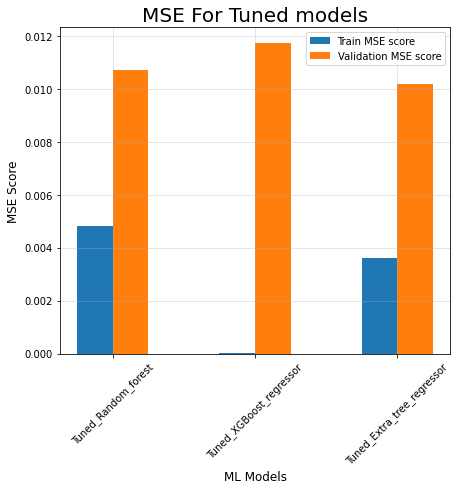

In [ ]:
plt.figure(figsize=(15,6))
plt.grid(alpha=0.4)
plt.bar(np.arange(3)-0.125,[MSE_rf_train,MSE_xgb_train,MSE_ext_train,],width=0.25,label='Train MSE score')
plt.bar(np.arange(3)+0.125,[MSE_rf_val,MSE_xgb_val,MSE_ext_val],width=0.25,label='Validation MSE score')
plt.xticks(ticks=np.arange(3),labels=['Tuned_Random_forest','Tuned_XGBoost_regressor','Tuned_Extra_tree_regressor'],rotation=45,fontsize=10)
plt.xlabel('ML Models',fontsize=12)
plt.ylabel('MSE Score',fontsize=12)
plt.title('MSE For Tuned models',fontsize=20)
plt.legend(prop={'size':10})
plt.show()

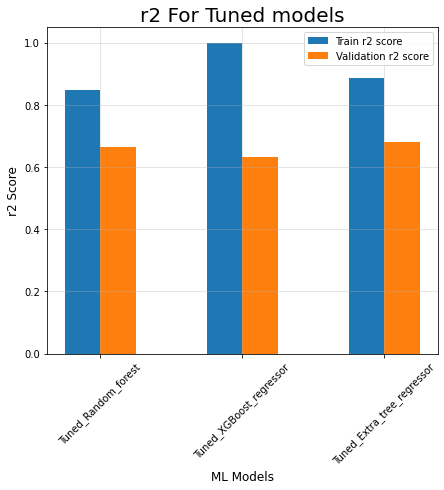

In [ ]:
plt.figure(figsize=(15,6))
plt.grid(alpha=0.4)
plt.bar(np.arange(3)-0.125,[r2_train_rf,r2_train_xgb,r2_train_ext,],width=0.25,label='Train r2 score')
plt.bar(np.arange(3)+0.125,[r2_val_rf,r2_val_xgb,r2_val_ext],width=0.25,label='Validation r2 score')
plt.xticks(ticks=np.arange(3),labels=['Tuned_Random_forest','Tuned_XGBoost_regressor','Tuned_Extra_tree_regressor'],rotation=45,fontsize=10)
plt.xlabel('ML Models',fontsize=12)
plt.ylabel('r2 Score',fontsize=12)
plt.title('r2 For Tuned models',fontsize=20)
plt.legend(prop={'size':10})
plt.show()

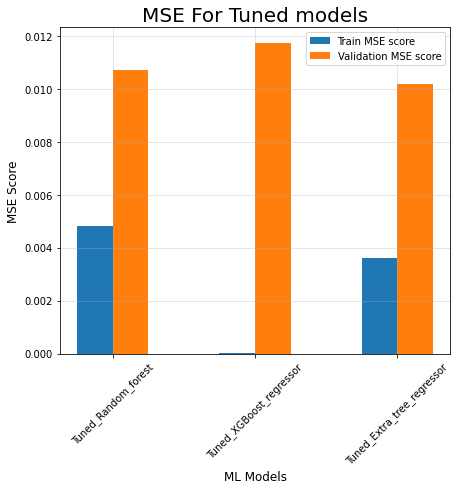

In [ ]:
plt.figure(figsize=(15,6))
plt.grid(alpha=0.4)
plt.bar(np.arange(3)-0.125,[MSE_rf_train,MSE_xgb_train,MSE_ext_train,],width=0.25,label='Train MSE score',edgecolor='blue')
plt.bar(np.arange(3)+0.125,[MSE_rf_val,MSE_xgb_val,MSE_ext_val],width=0.25,label='Validation MSE score',edgecolor='bllue')
plt.xticks(ticks=np.arange(3),labels=['Tuned_Random_forest','Tuned_XGBoost_regressor','Tuned_Extra_tree_regressor'],rotation=45,fontsize=10)
plt.xlabel('ML Models',fontsize=12)
plt.ylabel('MSE Score',fontsize=12)
plt.title('MSE For Tuned models',fontsize=20)
plt.legend(prop={'size':10})
plt.show()

No handles with labels found to put in legend.


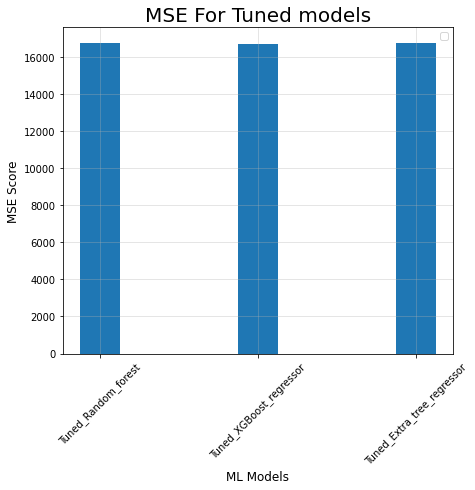

In [ ]:
plt.figure(figsize=(15,6))
plt.grid(alpha=0.4)
plt.bar(np.arange(3),[MSE_rf_test,MSE_xgb_test,MSE_ext_test,],width=0.25)
# plt.bar(np.arange(3)+0.125,[MSE_rf_val,MSE_xgb_val,MSE_ext_val],width=0.25,label='Test MSE score')
plt.xticks(ticks=np.arange(3),labels=['Tuned_Random_forest','Tuned_XGBoost_regressor','Tuned_Extra_tree_regressor'],rotation=45,fontsize=10)
plt.xlabel('ML Models',fontsize=12)
plt.ylabel('MSE Score',fontsize=12)
plt.title('MSE For Tuned models',fontsize=20)
plt.legend(prop={'size':10})
plt.show()

### Stacking

In [ ]:
# let's divide our dataset into training set and hold out set by 50%
train,val_train,test,val_test = train_test_split(X_scale,y_scale,test_size=0.5, random_state= 42)

# Again let's split the training set again into training and test dataset 
x_train,x_test,y_train_stack,y_test_stack =  train_test_split(train,test,test_size=0.2, random_state= 42)

In [ ]:
# max_depth=8,n_estimators=700

In [ ]:
model_xgb = XGBRegressor(max_depth = 30, n_estimators = 50, booster = 'dart')
model_rf = RandomForestRegressor(max_depth=110, max_features=7, min_samples_leaf=3,min_samples_split=10, n_estimators=1000,random_state=42)
model_etr = ExtraTreesRegressor(max_depth=120, max_features=7, min_samples_split=9,n_estimators=2000)

In [ ]:
## XGBoost Regressor (Base1 model)

model_xgb.fit(x_train,y_train_stack)
print(f"XGBoost Regressor : \nThe accuracy score of training set: {model_xgb.score(x_train,y_train_stack)}")
print(f"The accuracy score of test set: {model_xgb.score(x_test,y_test_stack)}",'\n','--'*50)
# print('The Training R2 score is :',r2_score(y_train,model_KNN_regressor.predict(x_train)),'\n'*50)


# Random Forest Regressor (Base model 2)

model_rf.fit(x_train,y_train_stack)
print(f"Random Forest Regressor : \nThe accuracy score of training set: {model_rf.score(x_train,y_train_stack)}")
print(f"The accuracy score of test set: {model_rf.score(x_test,y_test_stack)}",'\n','--'*50)
# print('The Training R2 score is :',r2_score(y_train,model_bagging.predict(x_train)))


# Extra Trees Regressor (Base model 3)

model_etr.fit(x_train,y_train_stack)
print(f"Extra Trees Regressor : \nThe accuracy score of training set: {model_etr.score(x_train,y_train_stack)}")
print(f"The accuracy score of test set: {model_etr.score(x_test,y_test_stack)}",'\n','--'*50)
# print('The Training R2 score is :',r2_score(y_train,model_bagging.predict(x_train)))

[16:01:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Regressor : 
The accuracy score of training set: 0.9988296732473078
The accuracy score of test set: 0.5718413677346045 
 ----------------------------------------------------------------------------------------------------
Random Forest Regressor : 
The accuracy score of training set: 0.8218673422496876
The accuracy score of test set: 0.6365960122783573 
 ----------------------------------------------------------------------------------------------------
Extra Trees Regressor : 
The accuracy score of training set: 0.8750500346209266
The accuracy score of test set: 0.6550788943998962 
 ----------------------------------------------------------------------------------------------------


In [ ]:
#Let's get the predictions of all the base models on the validation set val_train

#Prediction for Base model 1
predict_val1 = model_xgb.predict(val_train)
#Perdiction for Base model 2
predict_val2 = model_rf.predict(val_train)
#Perdiction for Base model 3
predict_val3 = model_etr.predict(val_train)


#Stacking
predict_val = np.column_stack((predict_val1,predict_val2,predict_val3))
predict_val

array([[0.52389413, 0.5304225 , 0.52817381],
       [0.62897408, 0.57897352, 0.58765458],
       [0.47714189, 0.4691547 , 0.46145093],
       ...,
       [0.14515695, 0.22355174, 0.2151256 ],
       [0.2987577 , 0.31658761, 0.30503545],
       [0.49980864, 0.49891974, 0.50976629]])

In [ ]:
#Let's get the prediction for all the base models on the test set x_test

#Prediction for Base model 1 test set
predict_test1 = model_xgb.predict(x_test)
#Prediction for Base model 2 test set
predict_test2 = model_rf.predict(x_test)
#Prediction for Base model 3 test set
predict_test3 = model_etr.predict(x_test)

#Let's stack the prediciton values for validation set together as "predict_test"

#Stacking
predict_test = np.column_stack((predict_test1,predict_test2,predict_test3))
predict_test

array([[0.27717119, 0.27471156, 0.27115982],
       [0.28949034, 0.31393401, 0.29744371],
       [0.44227183, 0.43236732, 0.41860454],
       ...,
       [0.53804022, 0.60480047, 0.57970651],
       [0.27298367, 0.26936473, 0.26827589],
       [0.27745229, 0.29217469, 0.30100487]])

In [ ]:
#Using Linear Regression as meta model
model_meta = RandomForestRegressor(max_depth=10, max_features=2,min_samples_leaf = 1, min_samples_split=6,n_estimators=2000,random_state=42)

model_meta.fit(predict_val,val_test)

#Let's check the accuracy of our meta_model using predict_test and y_test.

print(f"The accuracy score of stacked_train set: {model_meta.score(predict_val,val_test)}")
print(f"The accuracy score of test set: {model_meta.score(predict_test,y_test_stack)}")

print(f"The MSE score of stacked_train set: {metrics.mean_squared_error(model_meta.predict(predict_val),(val_test))}")
print(f"The MSE score of test set: {metrics.mean_squared_error(model_meta.predict(predict_test),(y_test_stack))}")


The accuracy score of stacked_train set: 0.7490256120569267
The accuracy score of test set: 0.6628977478631217
The MSE score of stacked_train set: 0.008017970555240013
The MSE score of test set: 0.01058612271142129


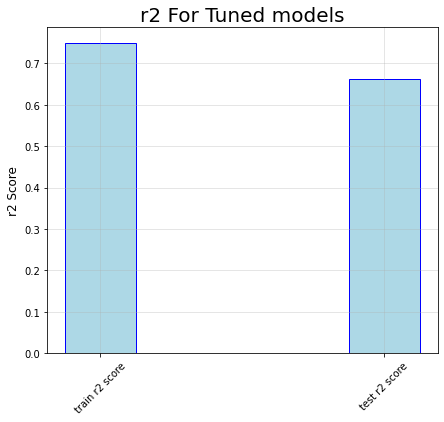

In [ ]:
plt.figure(figsize=(15,6))
plt.grid(alpha=0.4)
plt.bar(np.arange(2),[model_meta.score(predict_val,val_test),model_meta.score(predict_test,y_test_stack)],width=0.25,label='r2 score',align='center',color='lightblue',  edgecolor='blue')
plt.xticks(ticks=np.arange(2),labels=['train r2 score','test r2 score'],rotation=45,fontsize=10)
plt.ylabel('r2 Score',fontsize=12)
plt.title('r2 For Tuned models',fontsize=20)
#plt.legend(prop={'size':10})
plt.show()

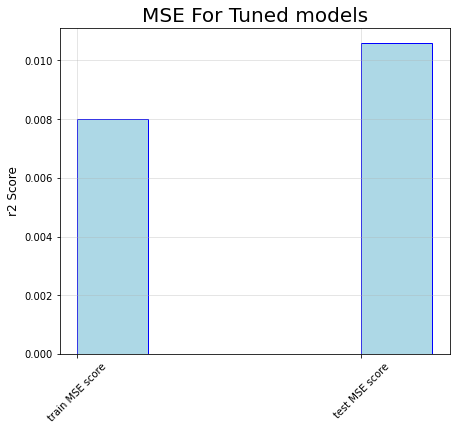

In [ ]:
plt.figure(figsize=(15,6))
plt.grid(alpha=0.4)
plt.bar(np.arange(2)+0.125,[metrics.mean_squared_error(model_meta.predict(predict_val),(val_test)),metrics.mean_squared_error(model_meta.predict(predict_test),(y_test_stack))],width=0.25,label='MSE Score',
        align='center',color='lightblue',  edgecolor='blue')
plt.xticks(ticks=np.arange(2),labels=['train MSE score','test MSE score'],rotation=45,fontsize=10)
plt.ylabel('r2 Score',fontsize=12)
plt.title('MSE For Tuned models',fontsize=20)
#plt.legend(prop={'size':10})
plt.show()

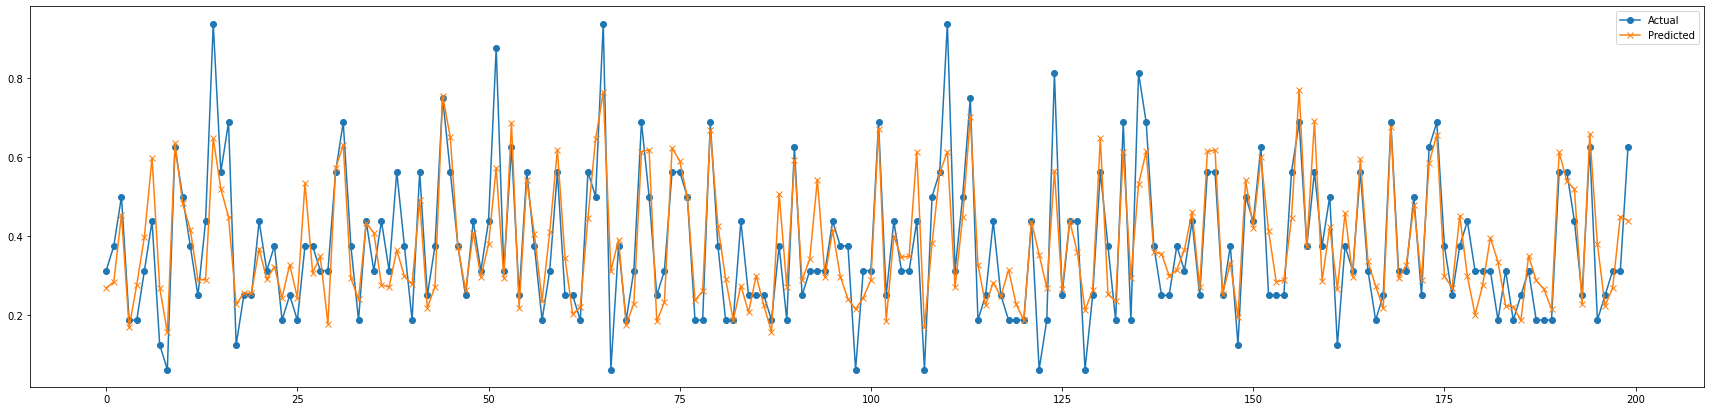

In [ ]:
plt.figure(figsize=(30,7))
plt.plot(np.array(y_test_stack[:200]),marker='o')
plt.plot(np.array(model_meta.predict(predict_test)[:200]),marker='x')
plt.legend(['Actual','Predicted'])
plt.show()